Task- 1 Restaurant Rating Prediction 

Objective: Build a machine learning model to predict theaggregate rating of a restaurant based on other features.
Steps:
-> Preprocess the dataset by handling missing values,encoding categorical variables, and splitting the datainto training and testing sets.
-> Select a regression algorithm (e.g., linear regression,decision tree regression) and train it on the training data.
-> Evaluate the model's performance using appropriate regression metrics (e.g., mean squared error, R-squared) on the testing data.
-> Interpret the model's results and analyze the most influential features affecting restaurant ratings.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error,r2_score


In [5]:
data= pd.read_csv("C:/Users/HP/Downloads/Cognifyz Technologies Task/Dataset .csv")
print("Dataset has been loaded")

Dataset has been loaded


Data Preprocessing

In [7]:
data.head()

Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM Megamall, Ortigas, Mandaluyong City   
4      SM Megamall, Ortigas, Mandaluyong City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   
2  Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831  14.581404   
3  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475  14.585318   
4  SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508  14.584450   

                           Cuisines  ...          Currency Has Table booking  \
0        French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                          Japanese  ...  Botswana Pula(P)               Yes   
2  Seafood, Asian, Filipino, Indian  ...  Botswana Pula(P)               Yes   
3                   Japanese, Sushi  ...  Botswana Pula(P)                No   
4                  Japanese, Korean  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   
2                  No                No                   No           4   
3                  No                No                   No           4   
4                  No                No                   No           4   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  
2               4.4         Green   Very Good   270  
3               4.9    Dark Green   Excellent   365  
4               4.8    Dark Green   Excellent   229  

[5 rows x 21 columns]

In [9]:
data.tail()

Restaurant ID           Restaurant Name  Country Code       City  \
9546        5915730               Naml۱ Gurme           208  ��stanbul   
9547        5908749              Ceviz A��ac۱           208  ��stanbul   
9548        5915807                     Huqqa           208  ��stanbul   
9549        5916112               A���k Kahve           208  ��stanbul   
9550        5927402  Walter's Coffee Roastery           208  ��stanbul   

                                                Address     Locality  \
9546  Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...     Karak�_y   
9547  Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...    Ko��uyolu   
9548  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...  Kuru�_e��me   
9549  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...  Kuru�_e��me   
9550  Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...         Moda   

            Locality Verbose  Longitude   Latitude  \
9546     Karak�_y, ��stanbul  28.977392  41.022793   
9547    Ko��uyolu, ��stanbul  29.041297  41.009847   
9548  Kuru�_e��me, ��stanbul  29.034640  41.055817   
9549  Kuru�_e��me, ��stanbul  29.036019  41.057979   
9550         Moda, ��stanbul  29.026016  40.984776   

                             Cuisines  ...          Currency  \
9546                          Turkish  ...  Turkish Lira(TL)   
9547  World Cuisine, Patisserie, Cafe  ...  Turkish Lira(TL)   
9548           Italian, World Cuisine  ...  Turkish Lira(TL)   
9549                  Restaurant Cafe  ...  Turkish Lira(TL)   
9550                             Cafe  ...  Turkish Lira(TL)   

     Has Table booking Has Online delivery Is delivering now  \
9546                No                  No                No   
9547                No                  No                No   
9548                No                  No                No   
9549                No                  No                No   
9550                No                  No                No   

     Switch to order menu Price range  Aggregate rating  Rating color  \
9546                   No           3               4.1         Green   
9547                   No           3               4.2         Green   
9548                   No           4               3.7        Yellow   
9549                   No           4               4.0         Green   
9550                   No           2               4.0         Green   

     Rating text Votes  
9546   Very Good   788  
9547   Very Good  1034  
9548        Good   661  
9549   Very Good   901  
9550   Very Good   591  

[5 rows x 21 columns]

In [11]:
data.shape

(9551, 21)

In [13]:
data.describe()

Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000          2.500000      5.000000  
50%              400.000000     2.000000          3.200000     31.000000  
75%              700.000000     2.000000          3.700000    131.000000  
max           800000.000000     4.000000          4.900000  10934.000000

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

check for null value

In [18]:
data.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

check for Nan Value

In [21]:
data.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

check if there is any zeroes in the data or not

In [24]:
data[data==0].count()

Restaurant ID              0
Restaurant Name            0
Country Code               0
City                       0
Address                    0
Locality                   0
Locality Verbose           0
Longitude                498
Latitude                 498
Cuisines                   0
Average Cost for two      18
Currency                   0
Has Table booking          0
Has Online delivery        0
Is delivering now          0
Switch to order menu       0
Price range                0
Aggregate rating        2148
Rating color               0
Rating text                0
Votes                   1094
dtype: int64

In [26]:
data.dtypes

Restaurant ID             int64
Restaurant Name          object
Country Code              int64
City                     object
Address                  object
Locality                 object
Locality Verbose         object
Longitude               float64
Latitude                float64
Cuisines                 object
Average Cost for two      int64
Currency                 object
Has Table booking        object
Has Online delivery      object
Is delivering now        object
Switch to order menu     object
Price range               int64
Aggregate rating        float64
Rating color             object
Rating text              object
Votes                     int64
dtype: object

In [28]:
data=data.fillna('incomplete')

Data Visualization

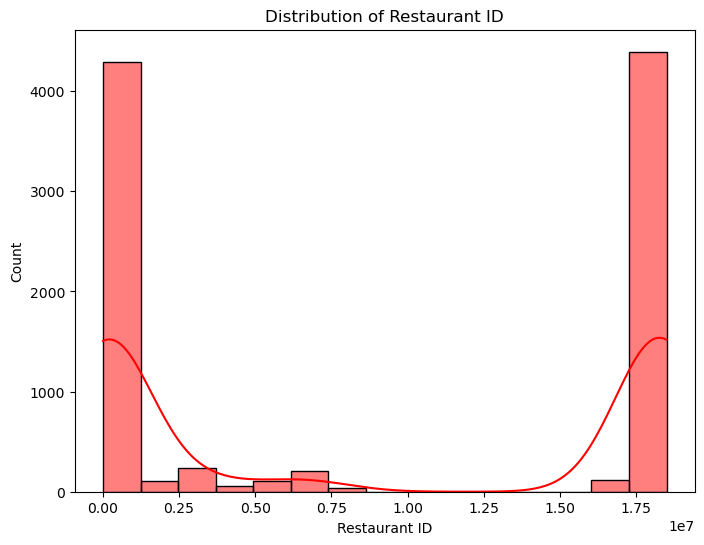

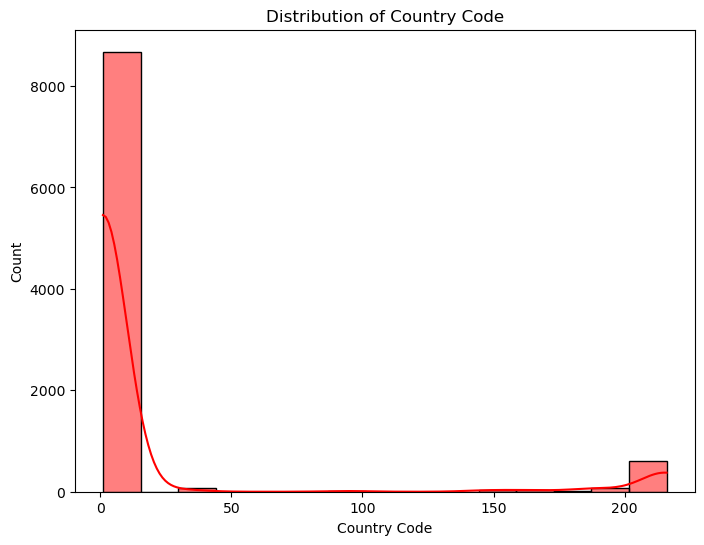

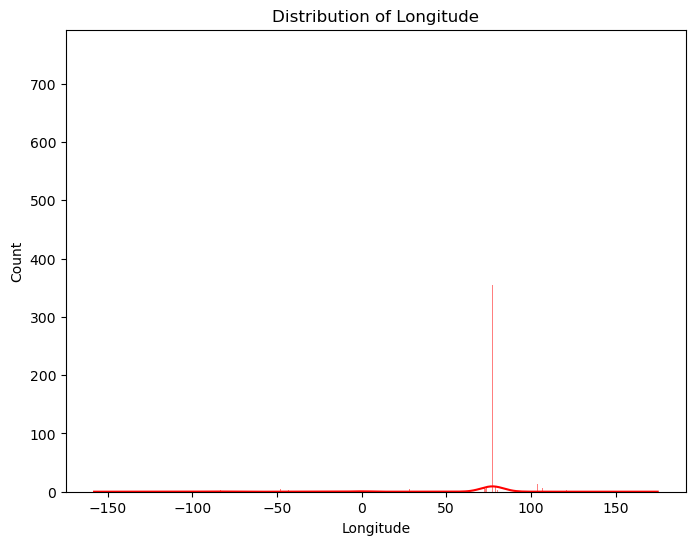

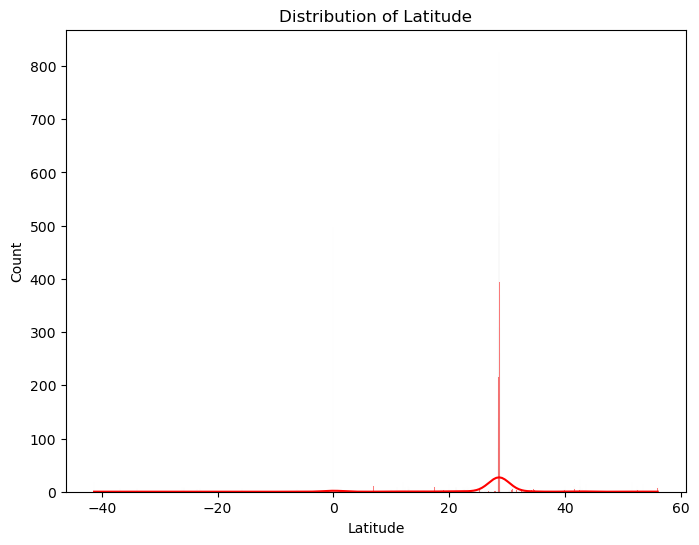

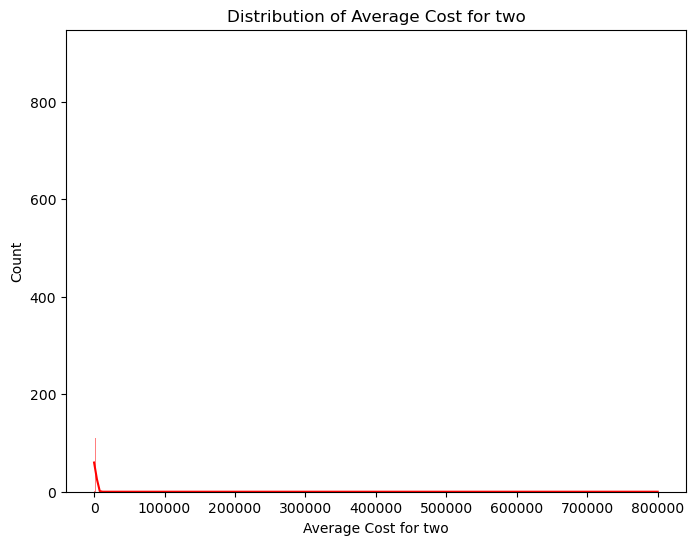

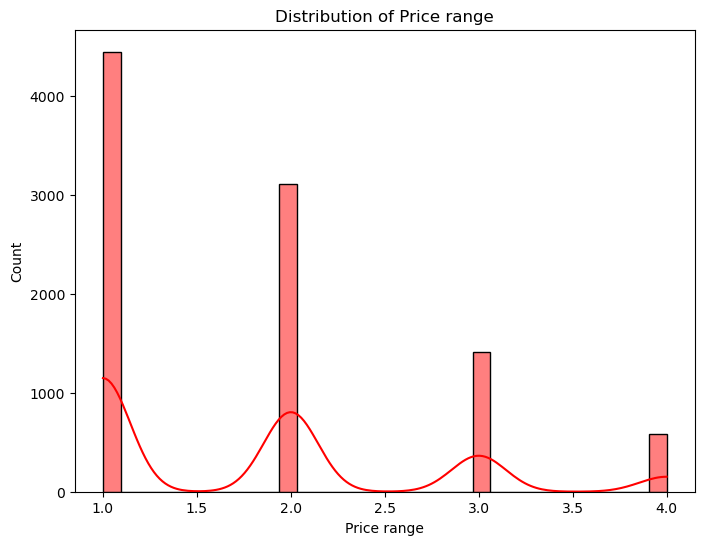

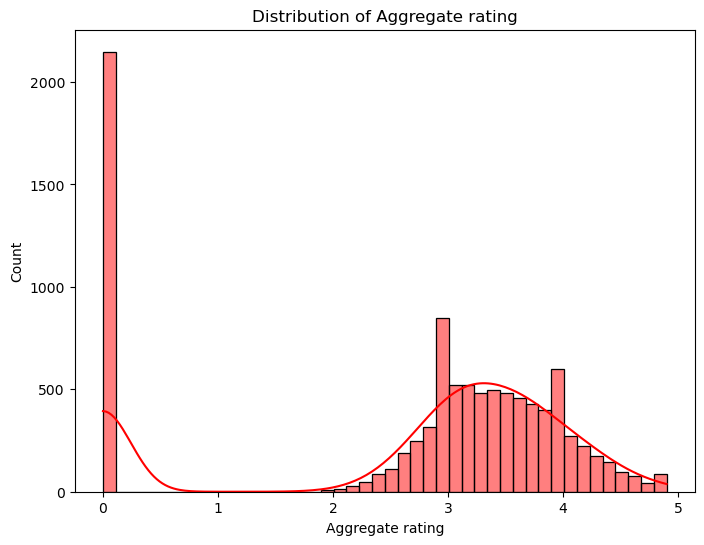

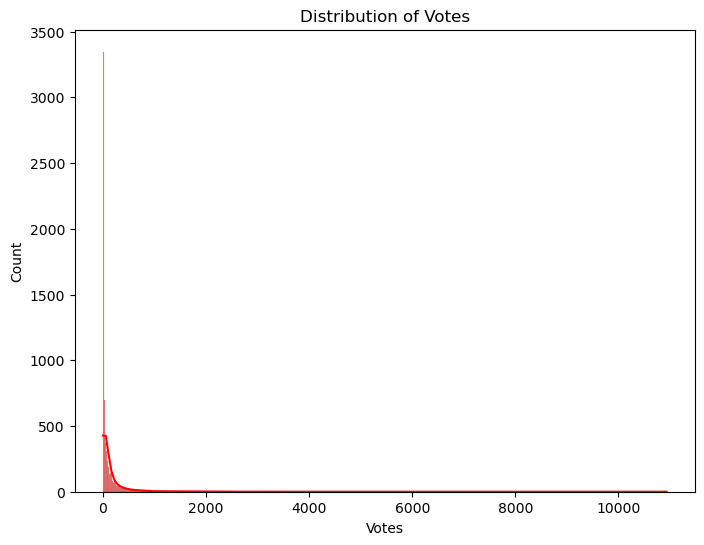

In [8]:
num_features = data.select_dtypes(include=np.number)
for col in num_features.columns:
    plt.figure(figsize=(8,6))
    sns.histplot(data[col],kde=True,color='r')
    plt.title(f'Distribution of {col}')
    plt.show()

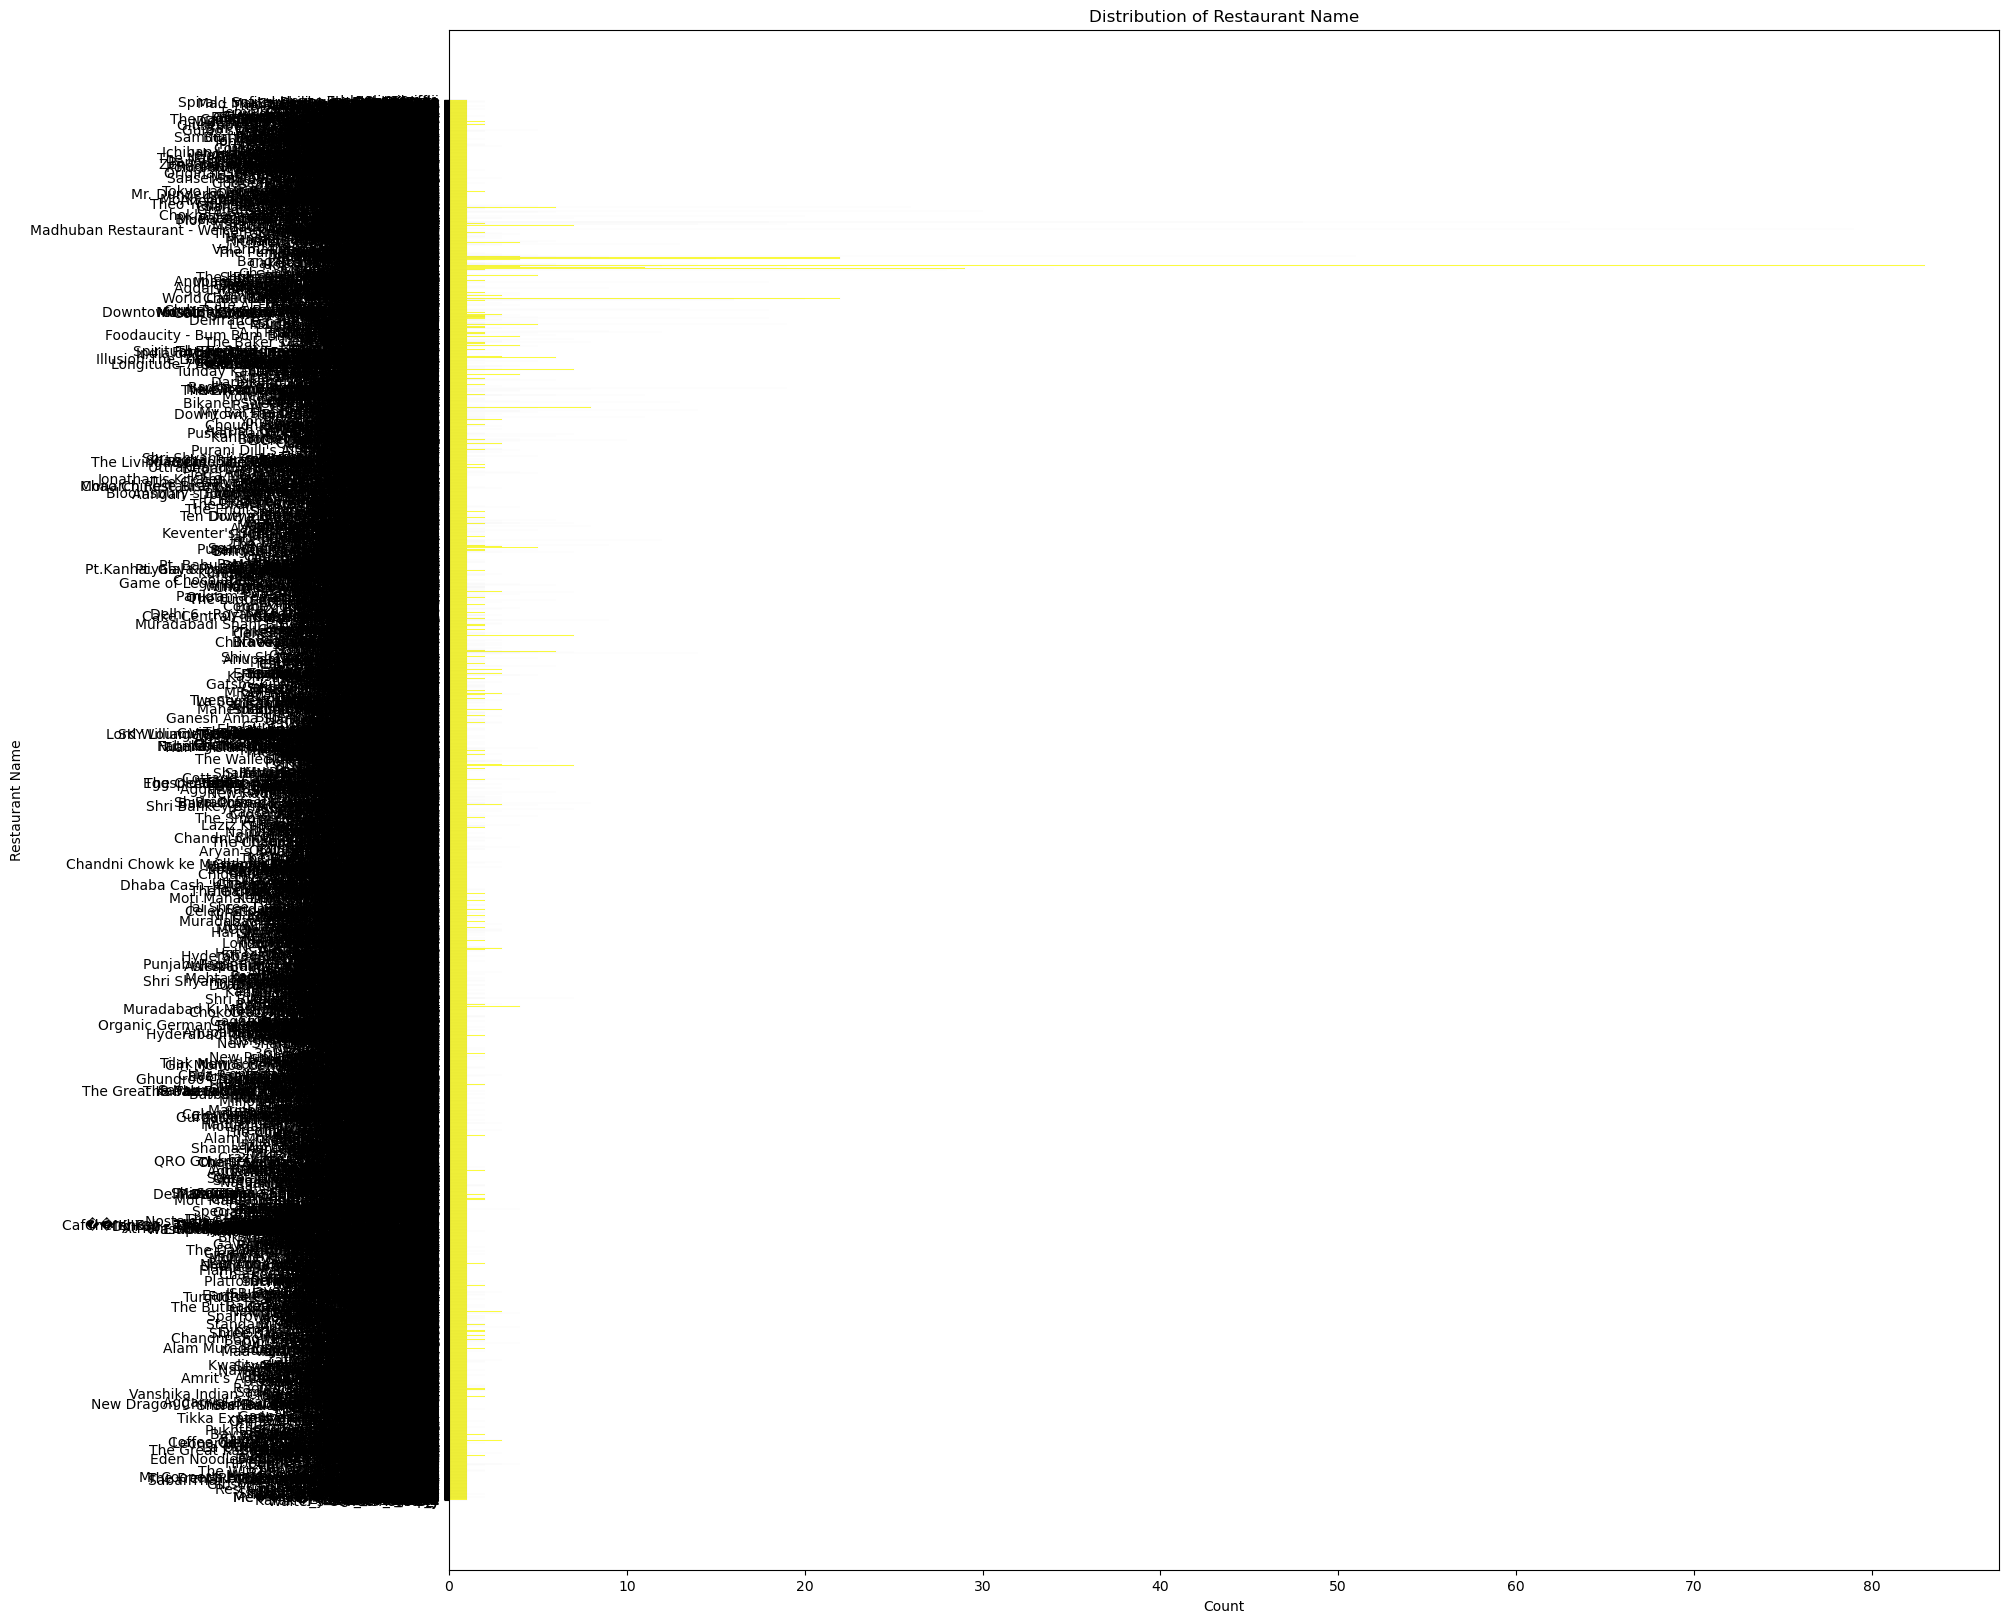

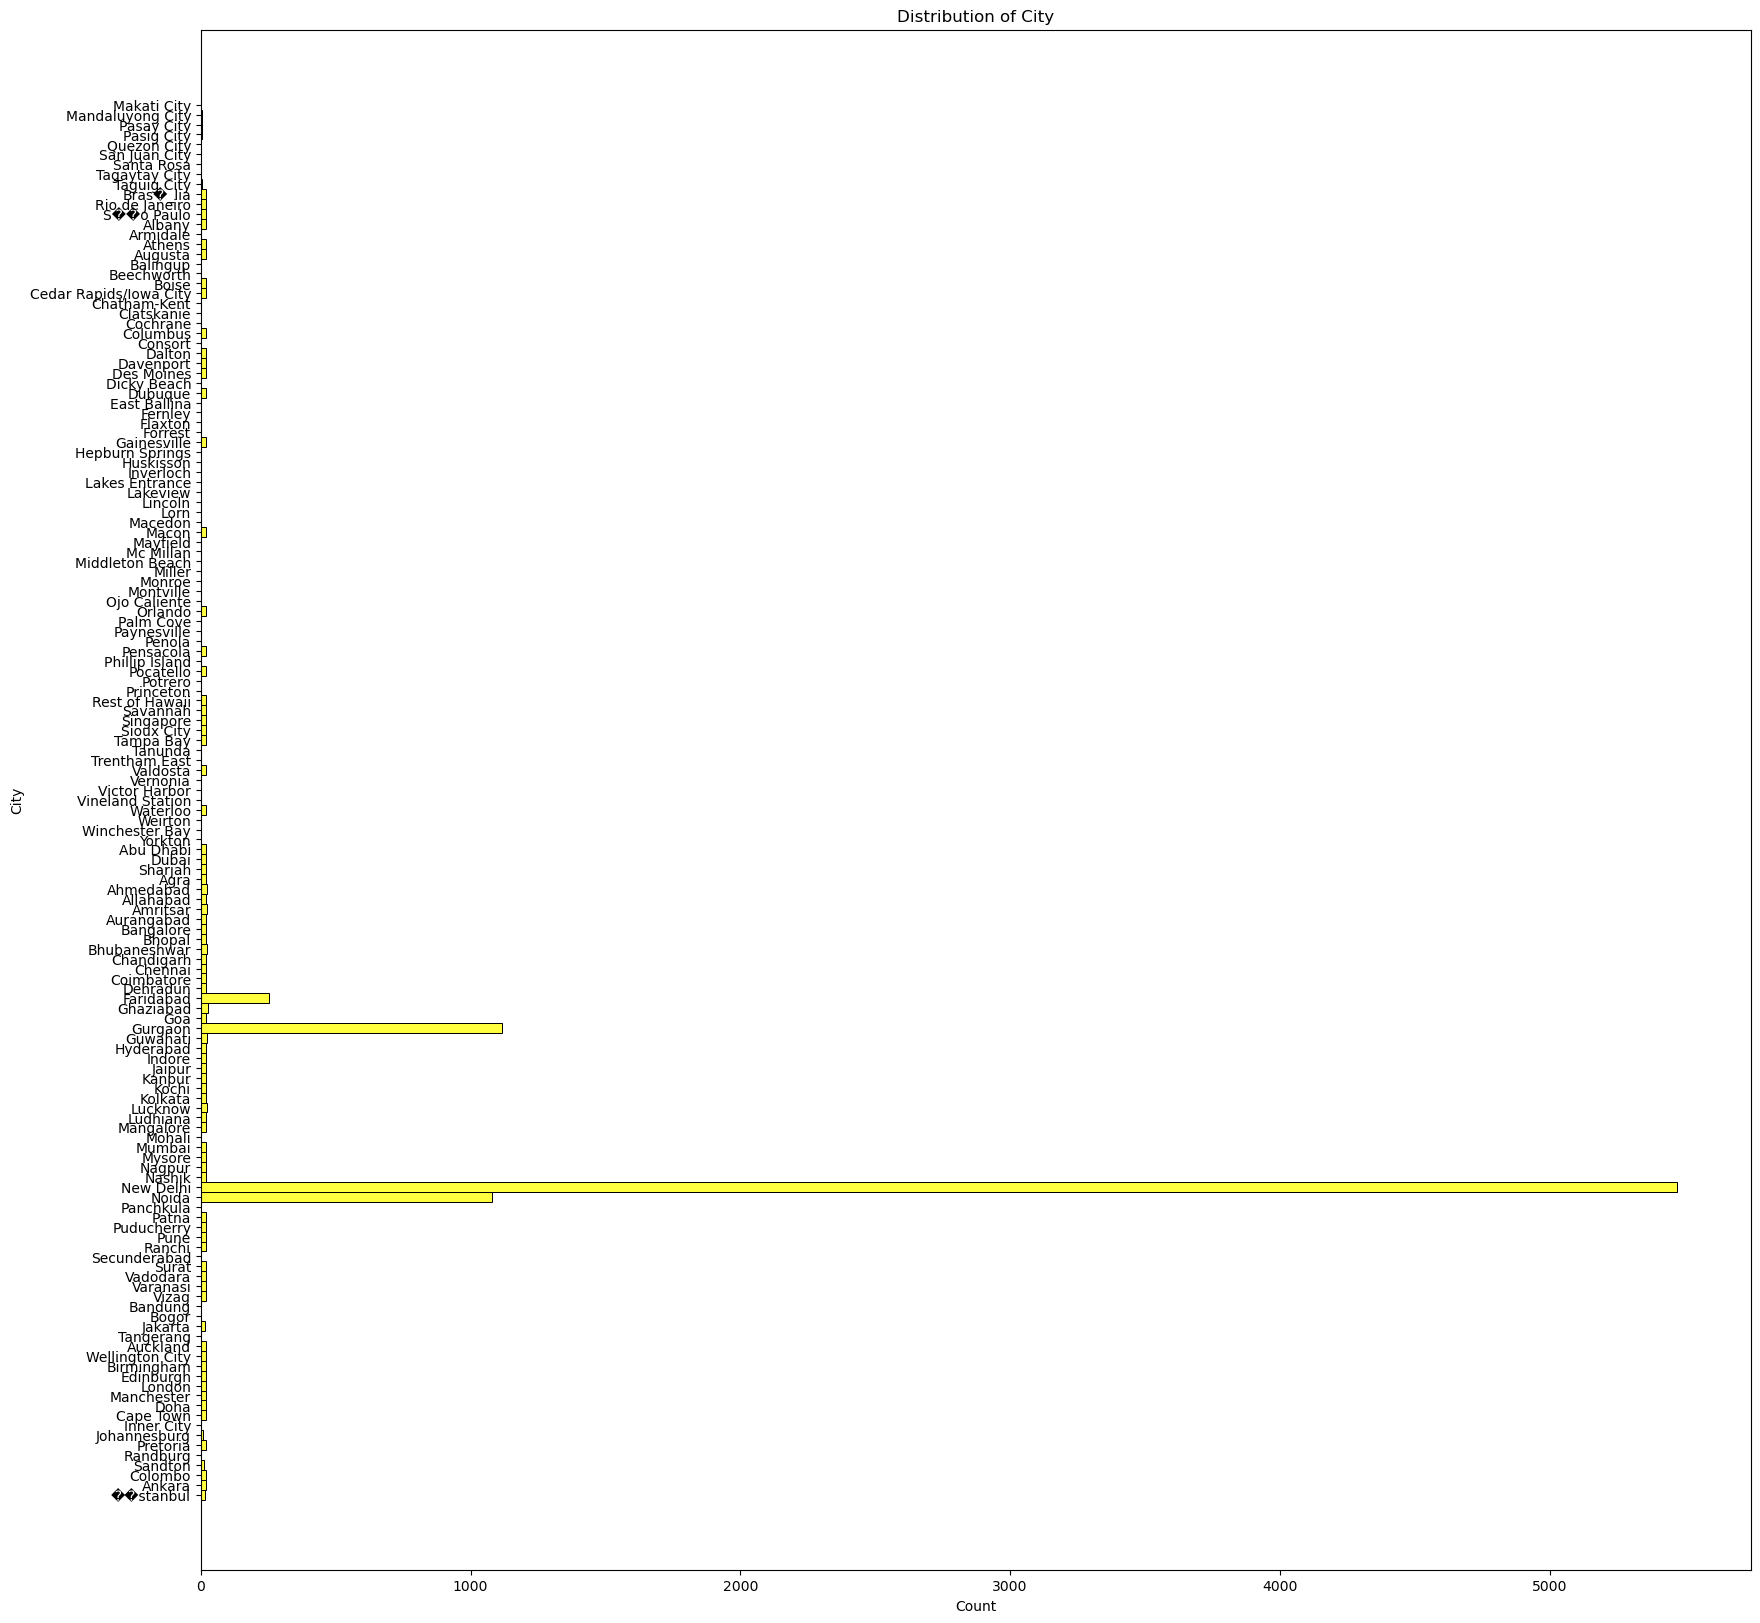

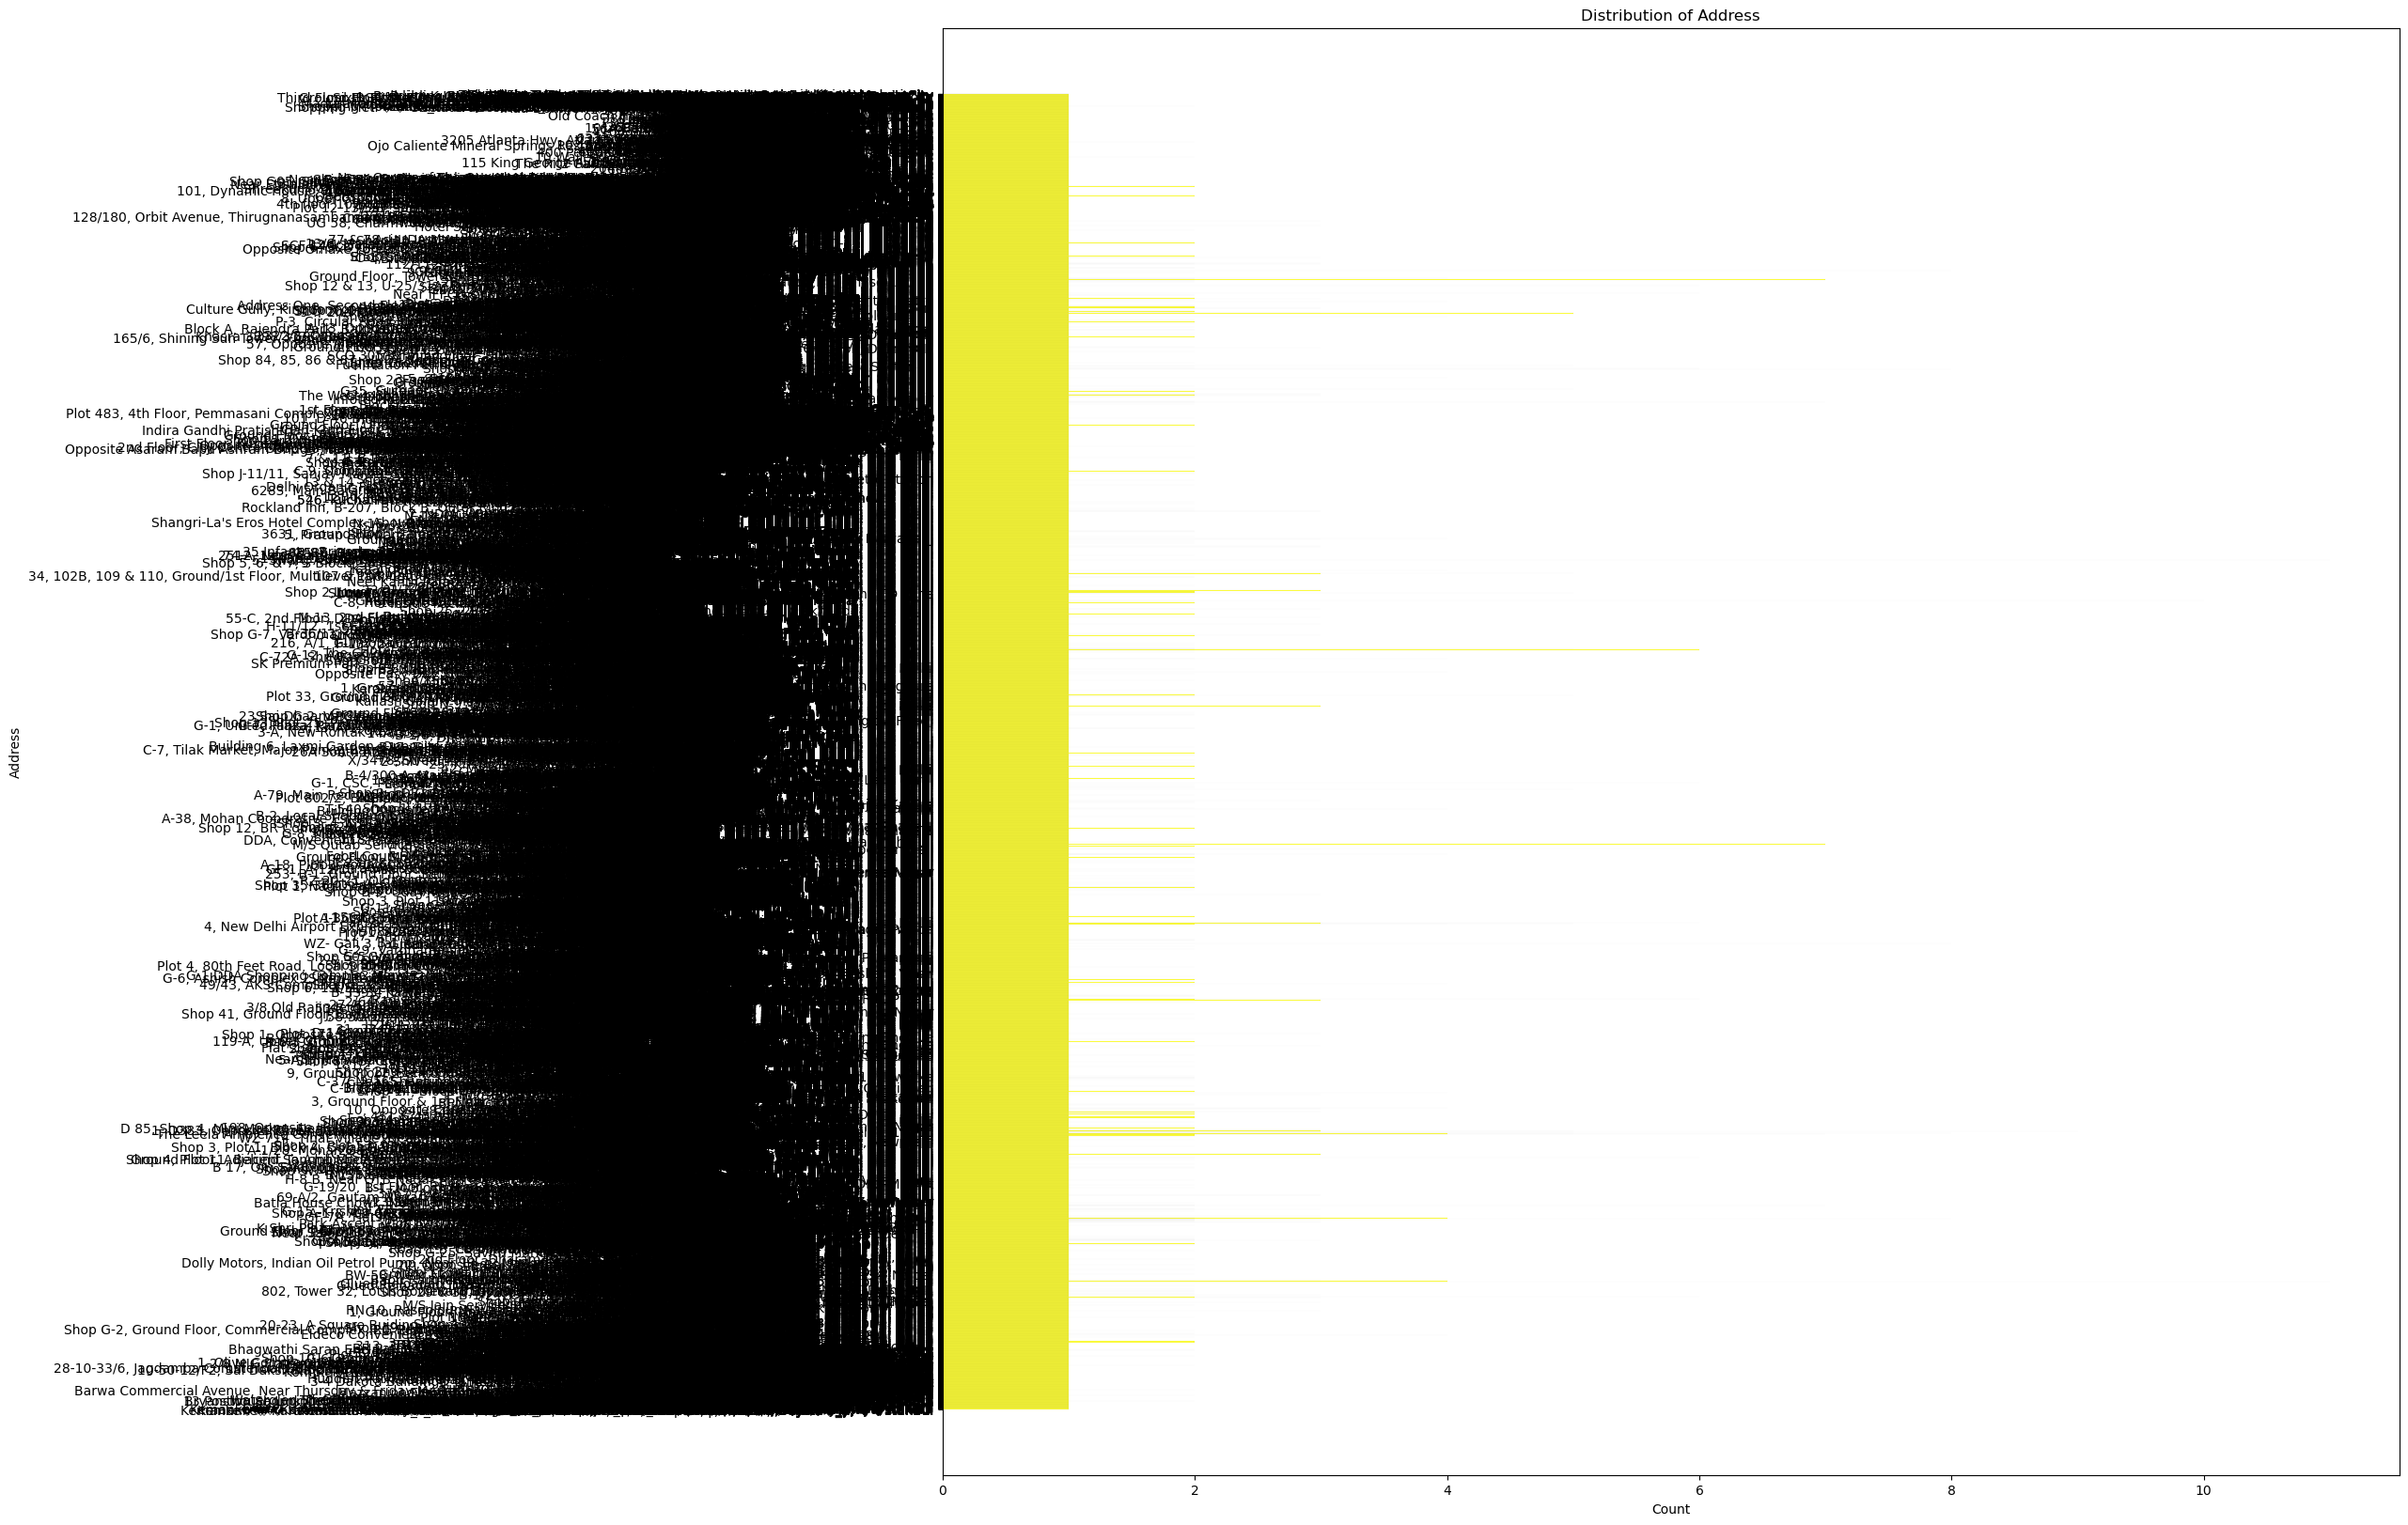

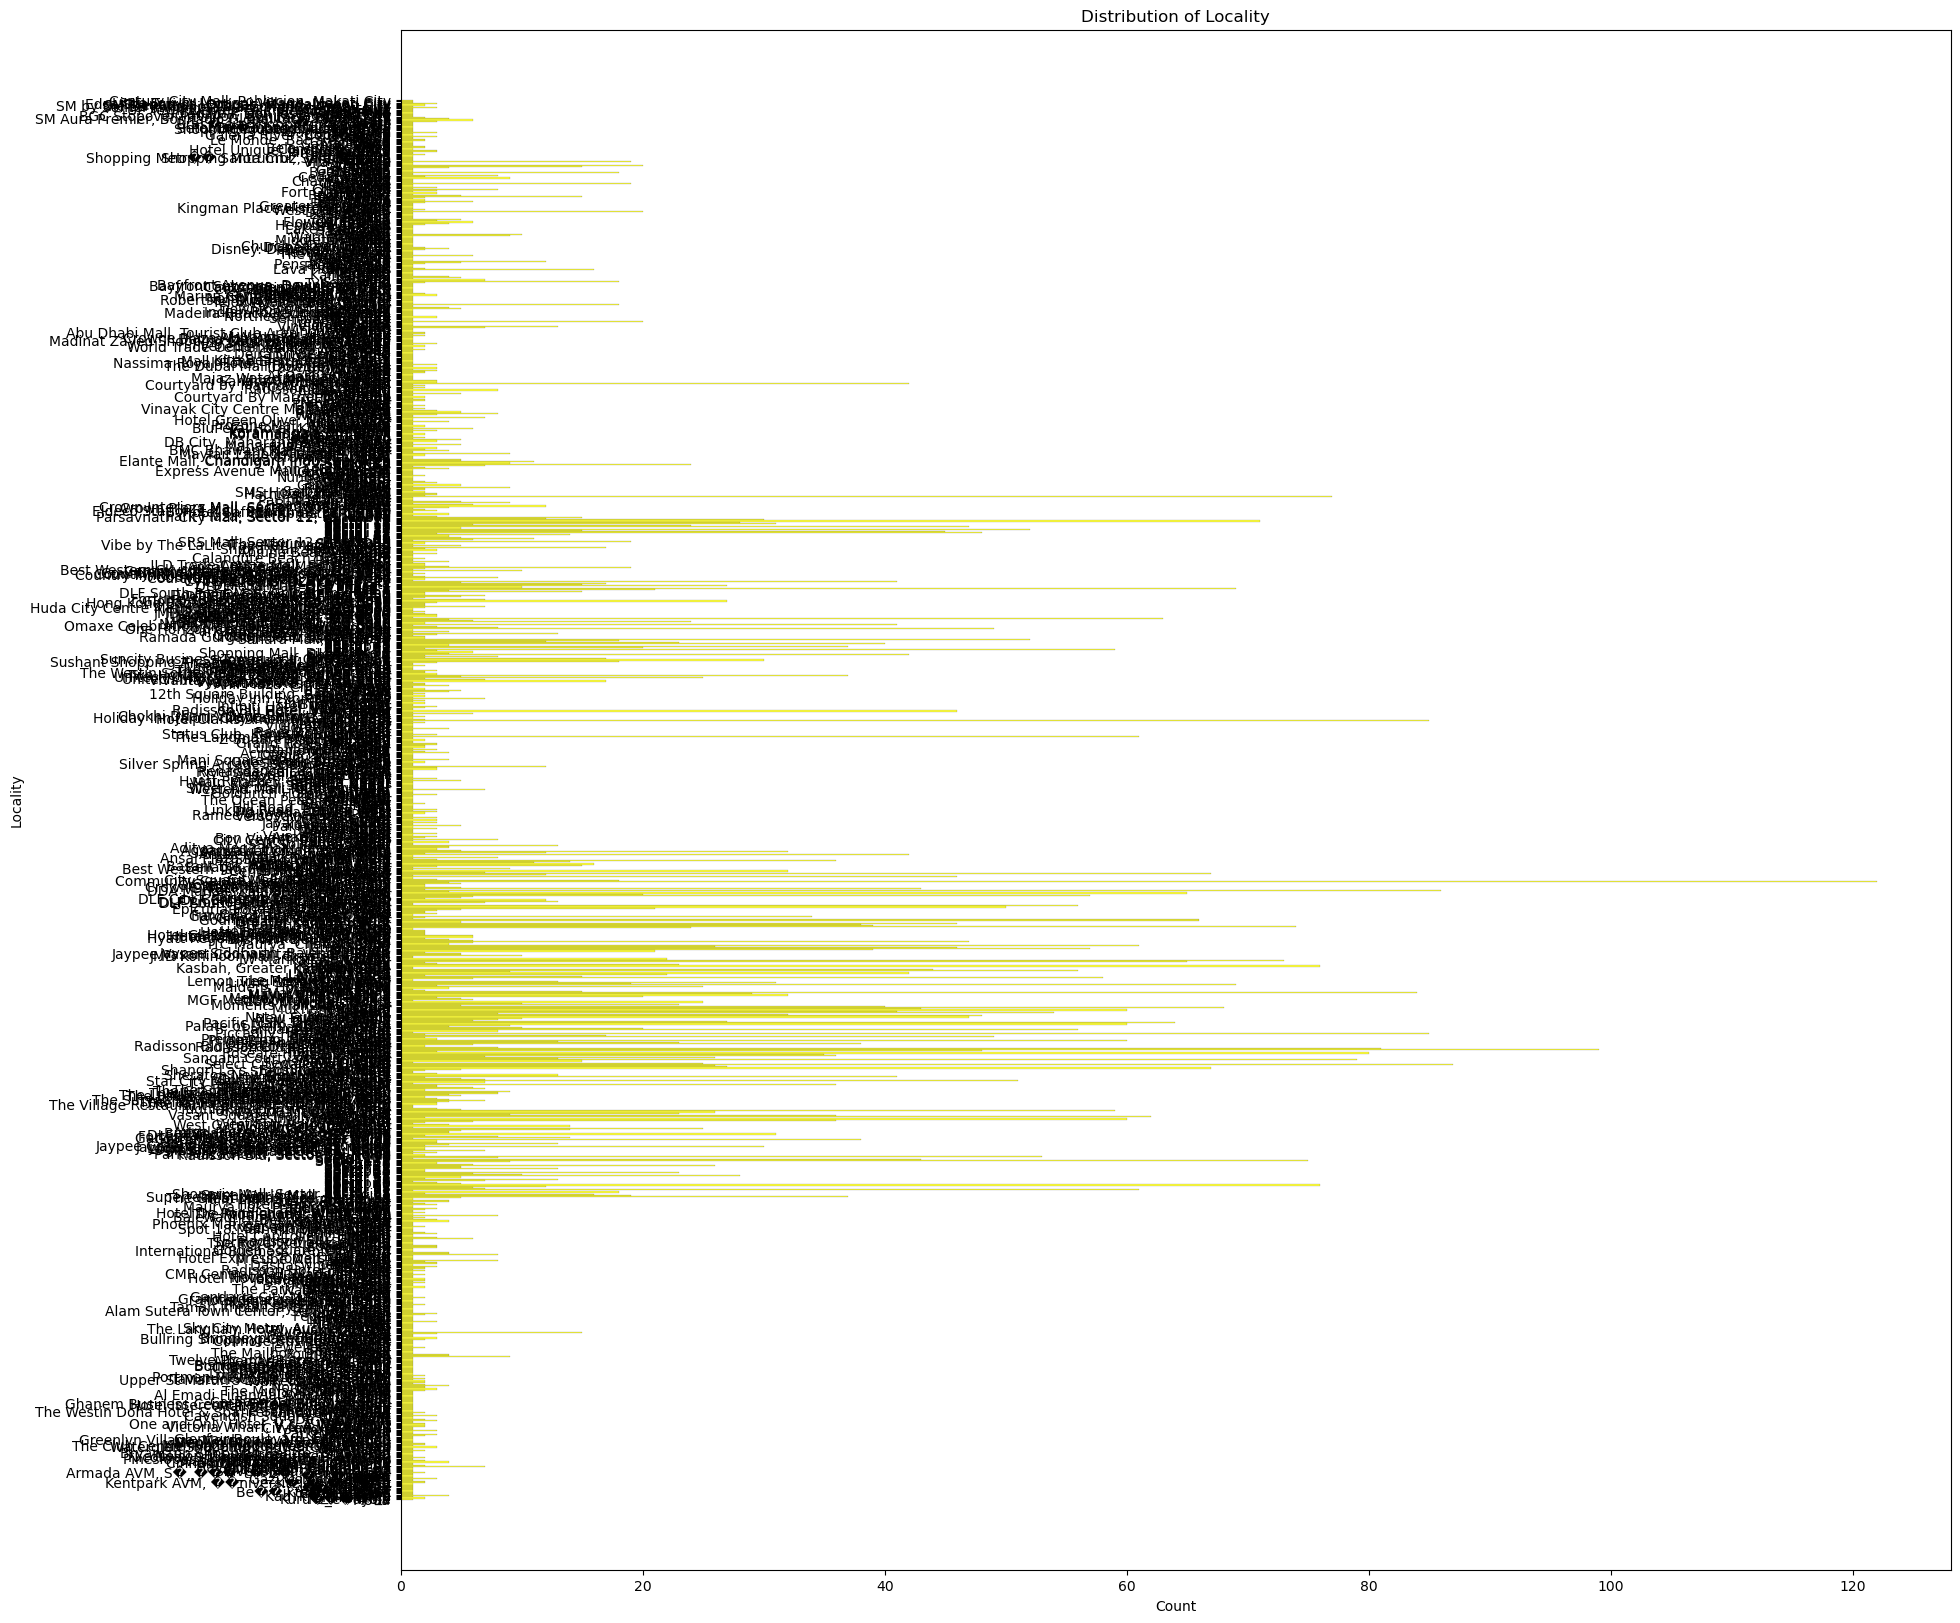

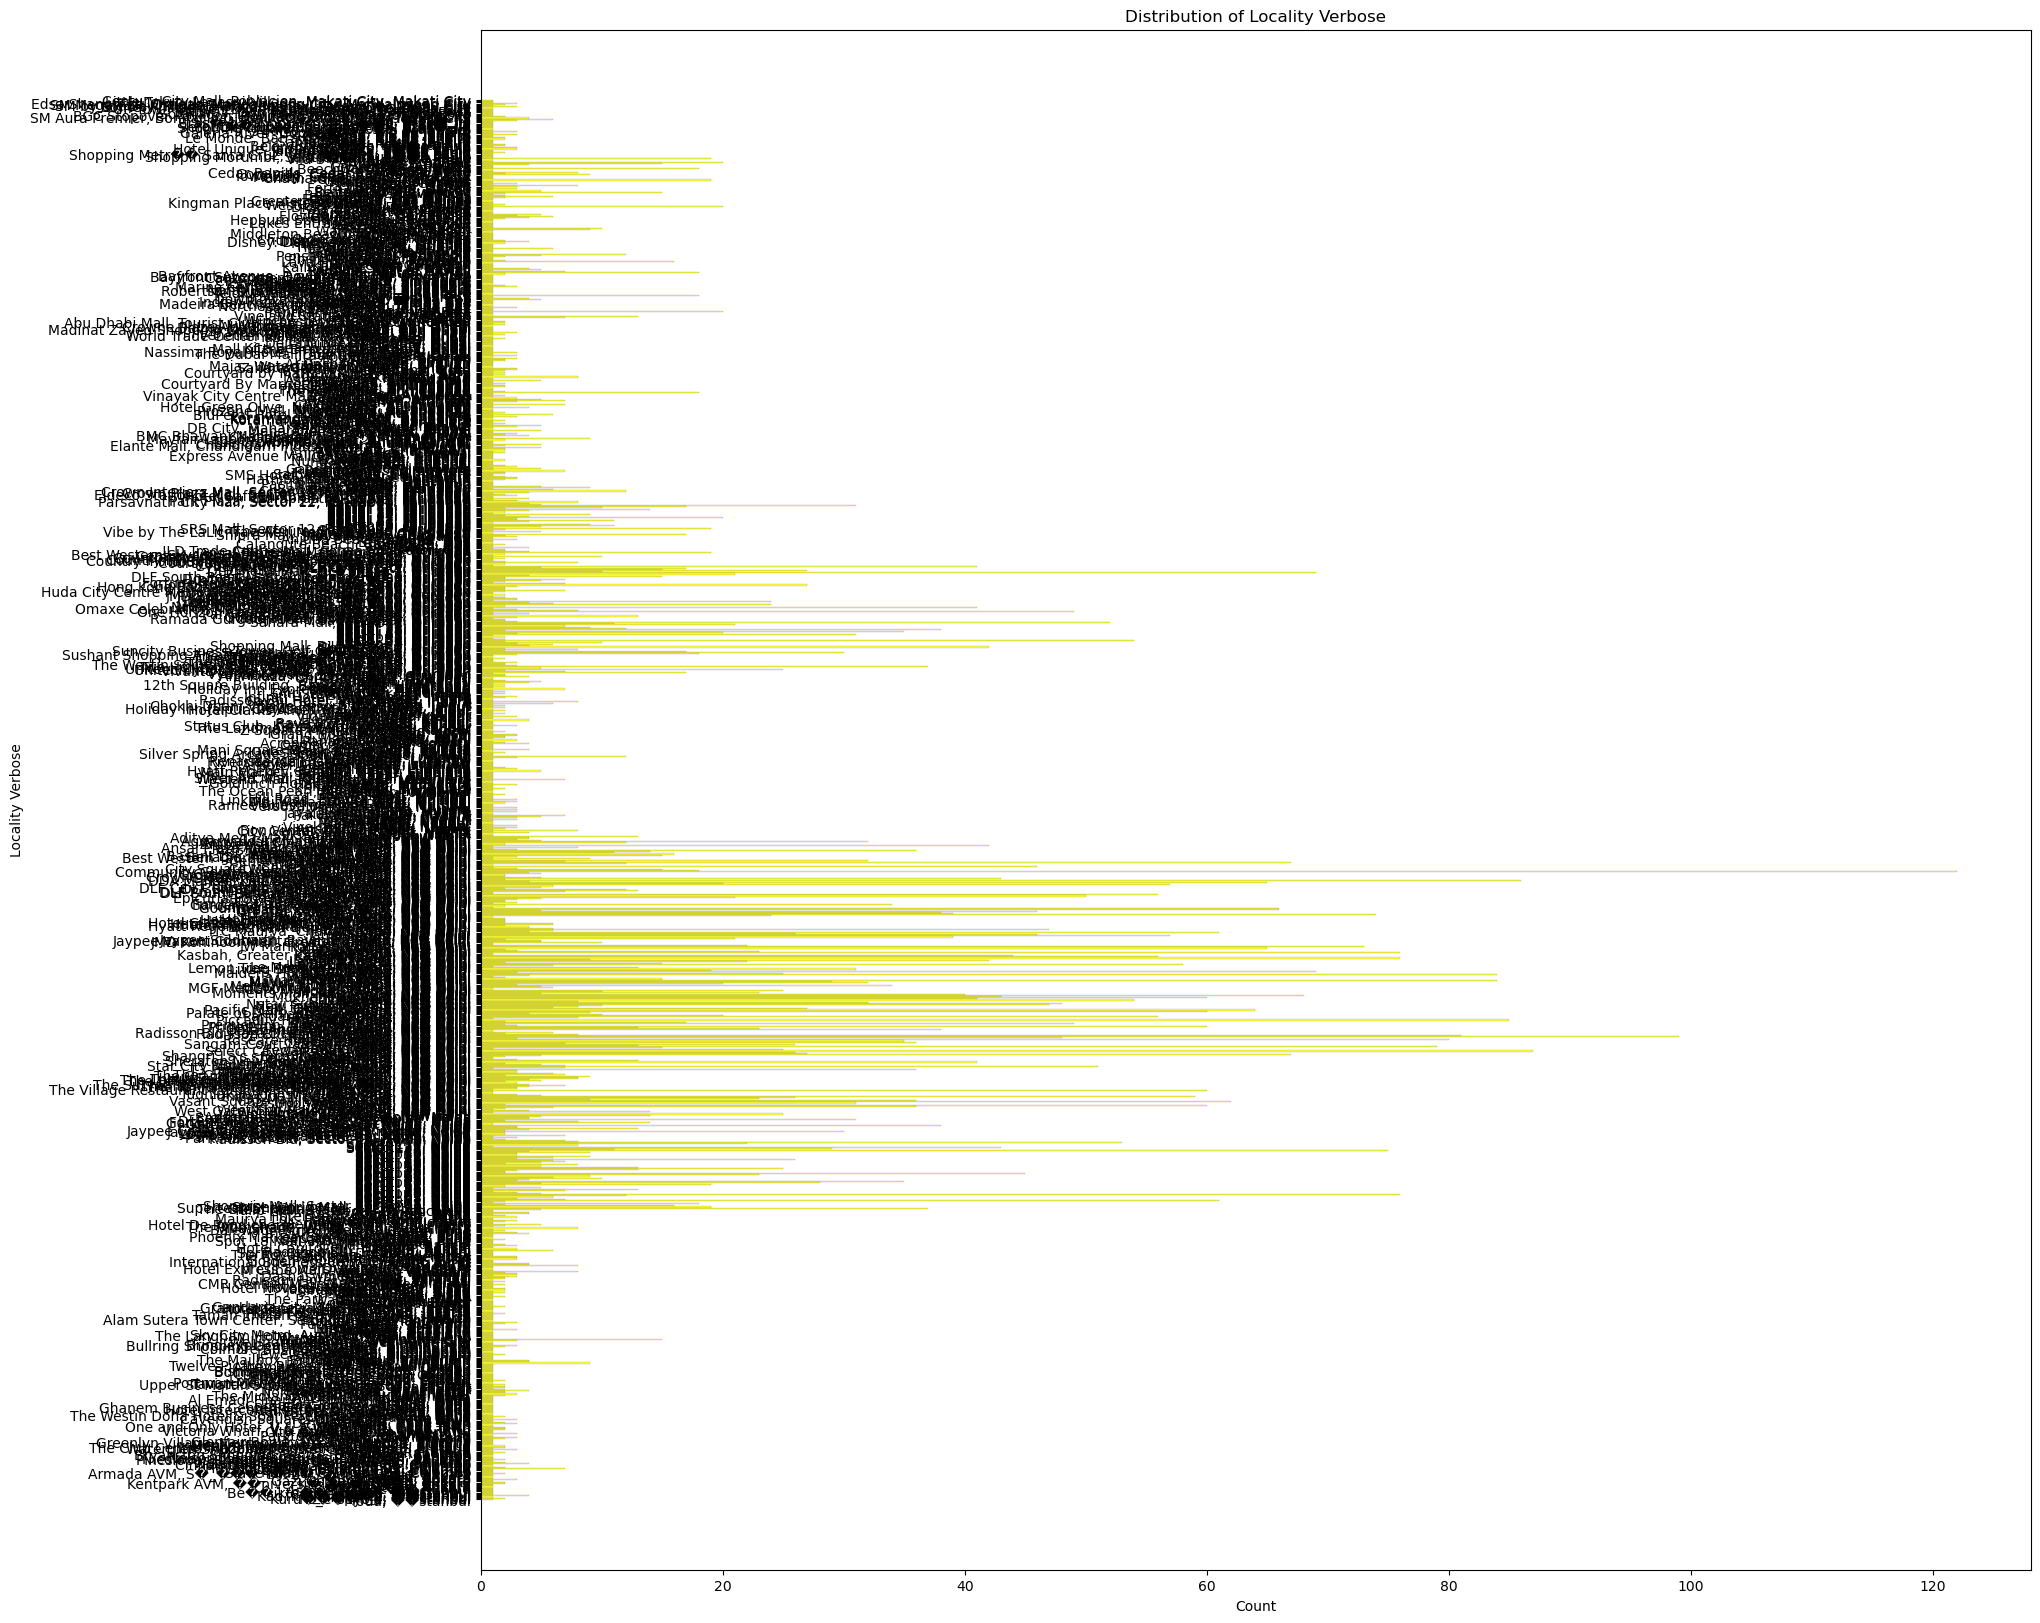

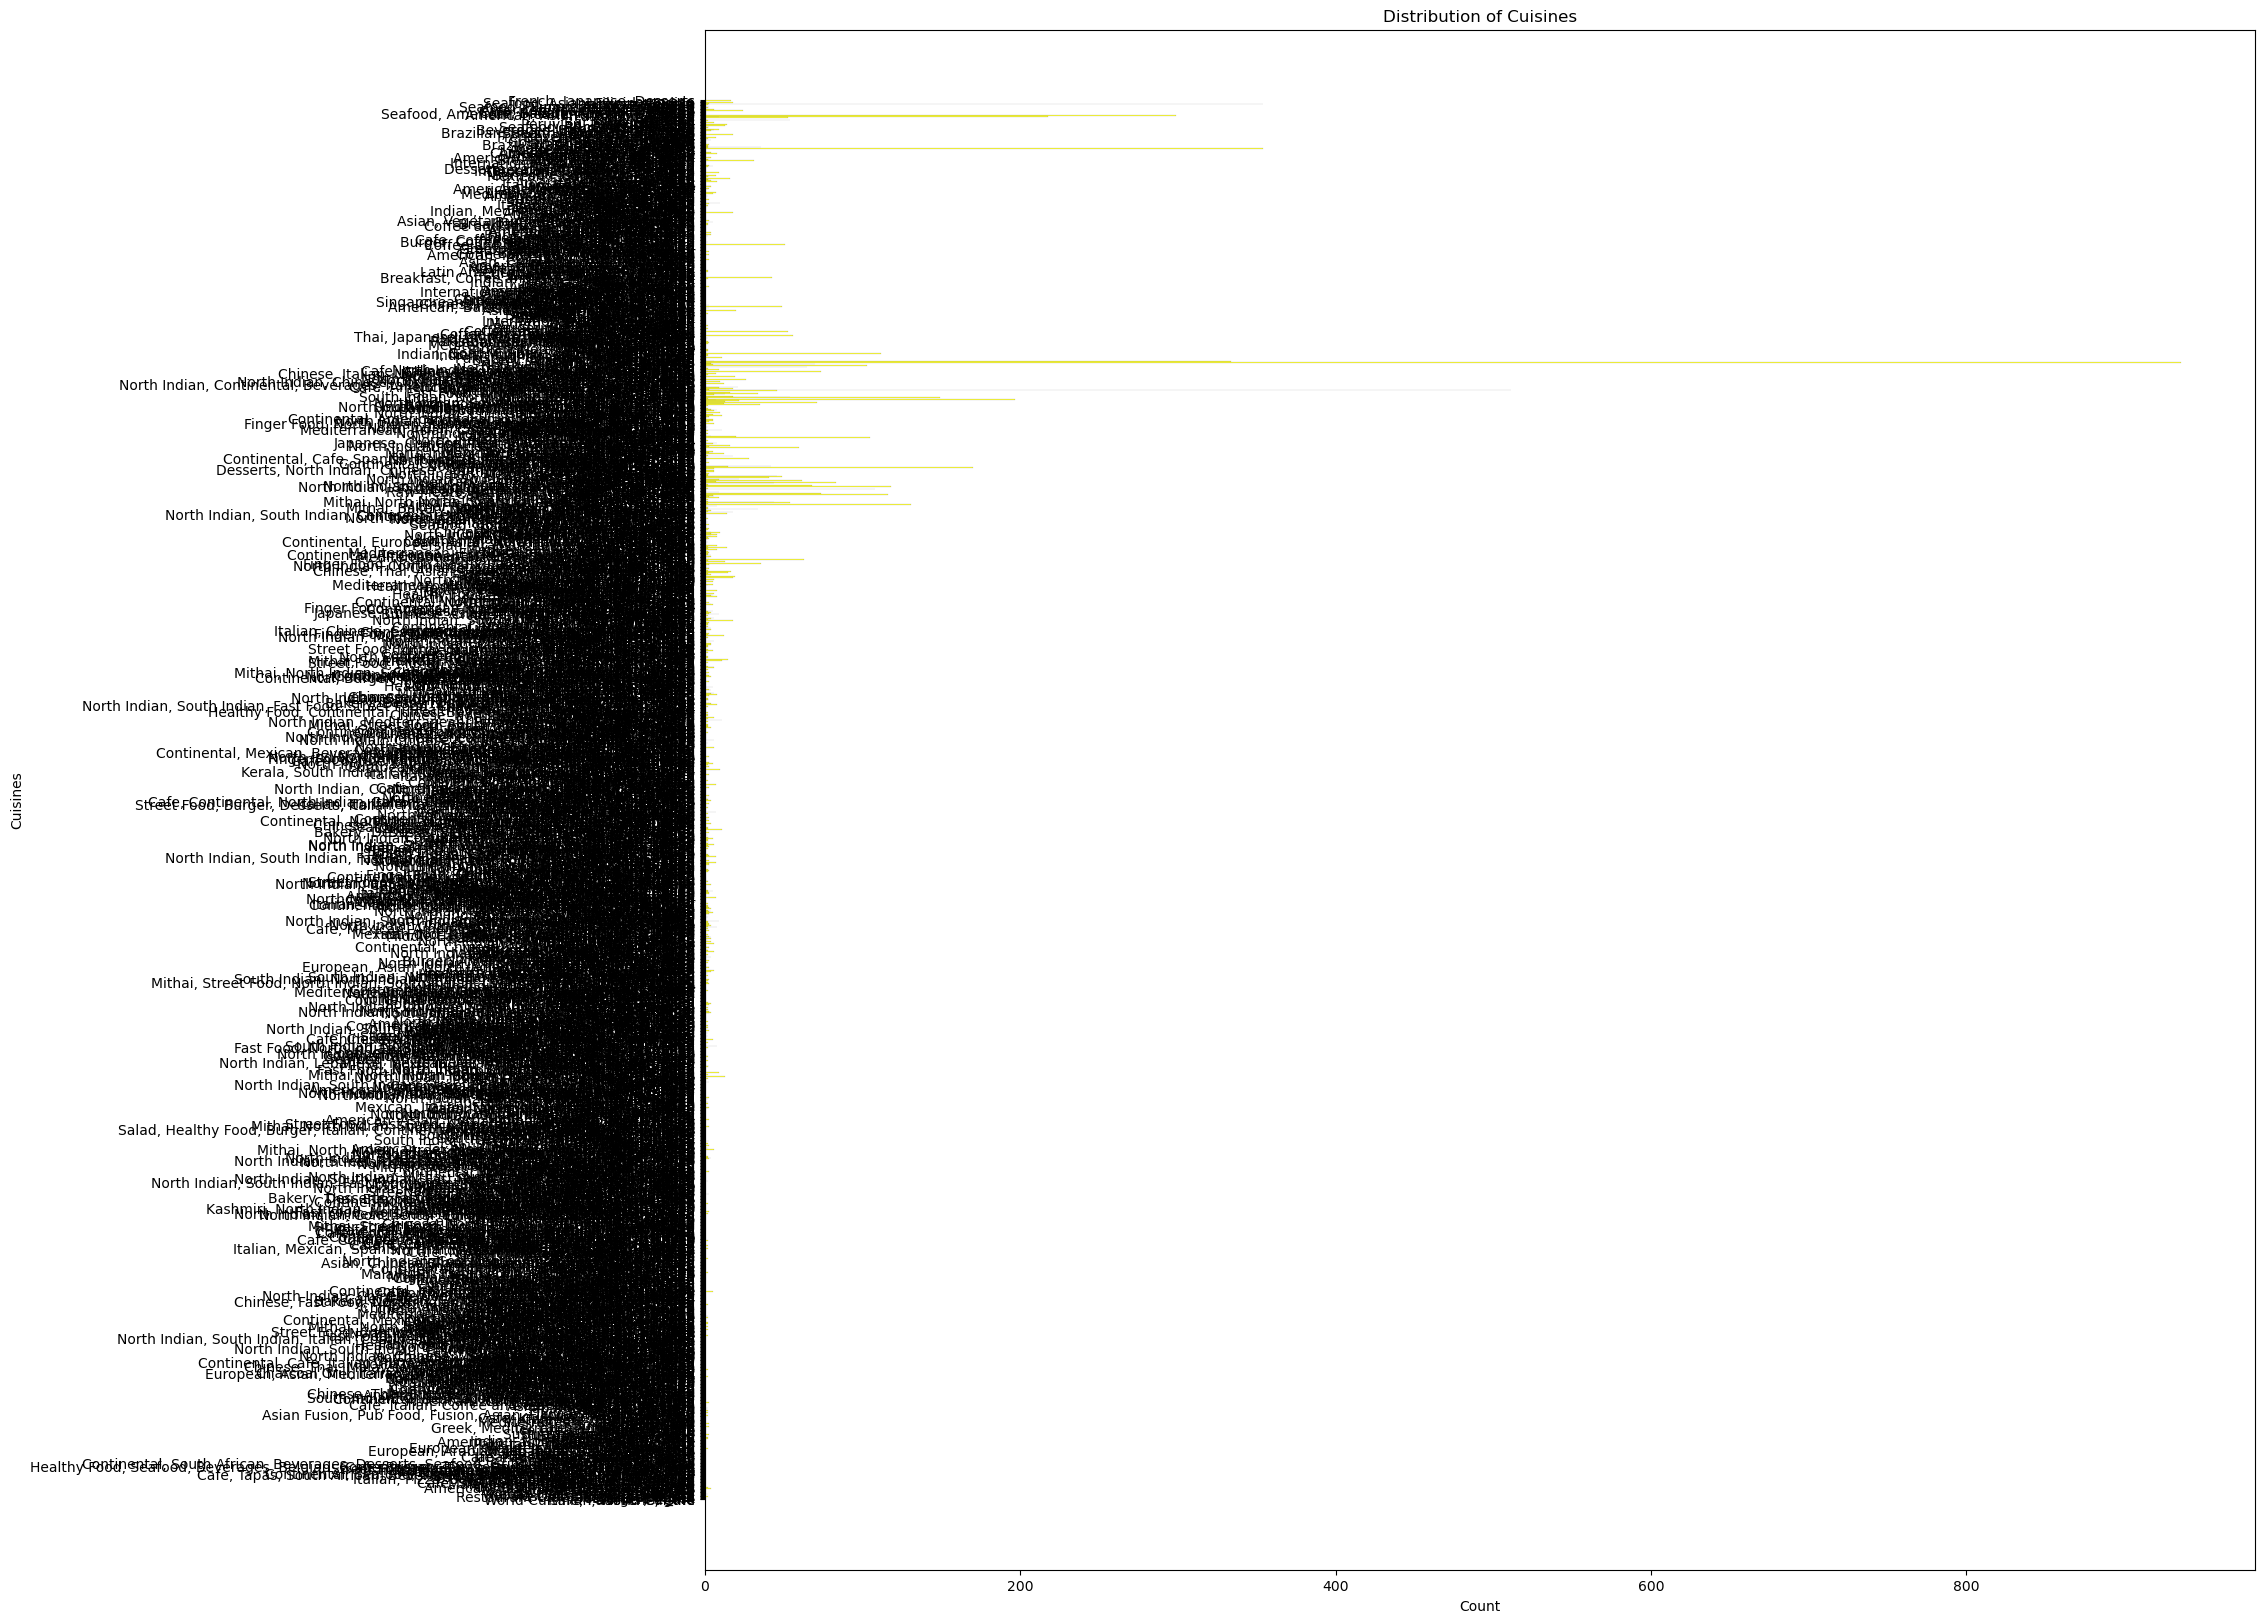

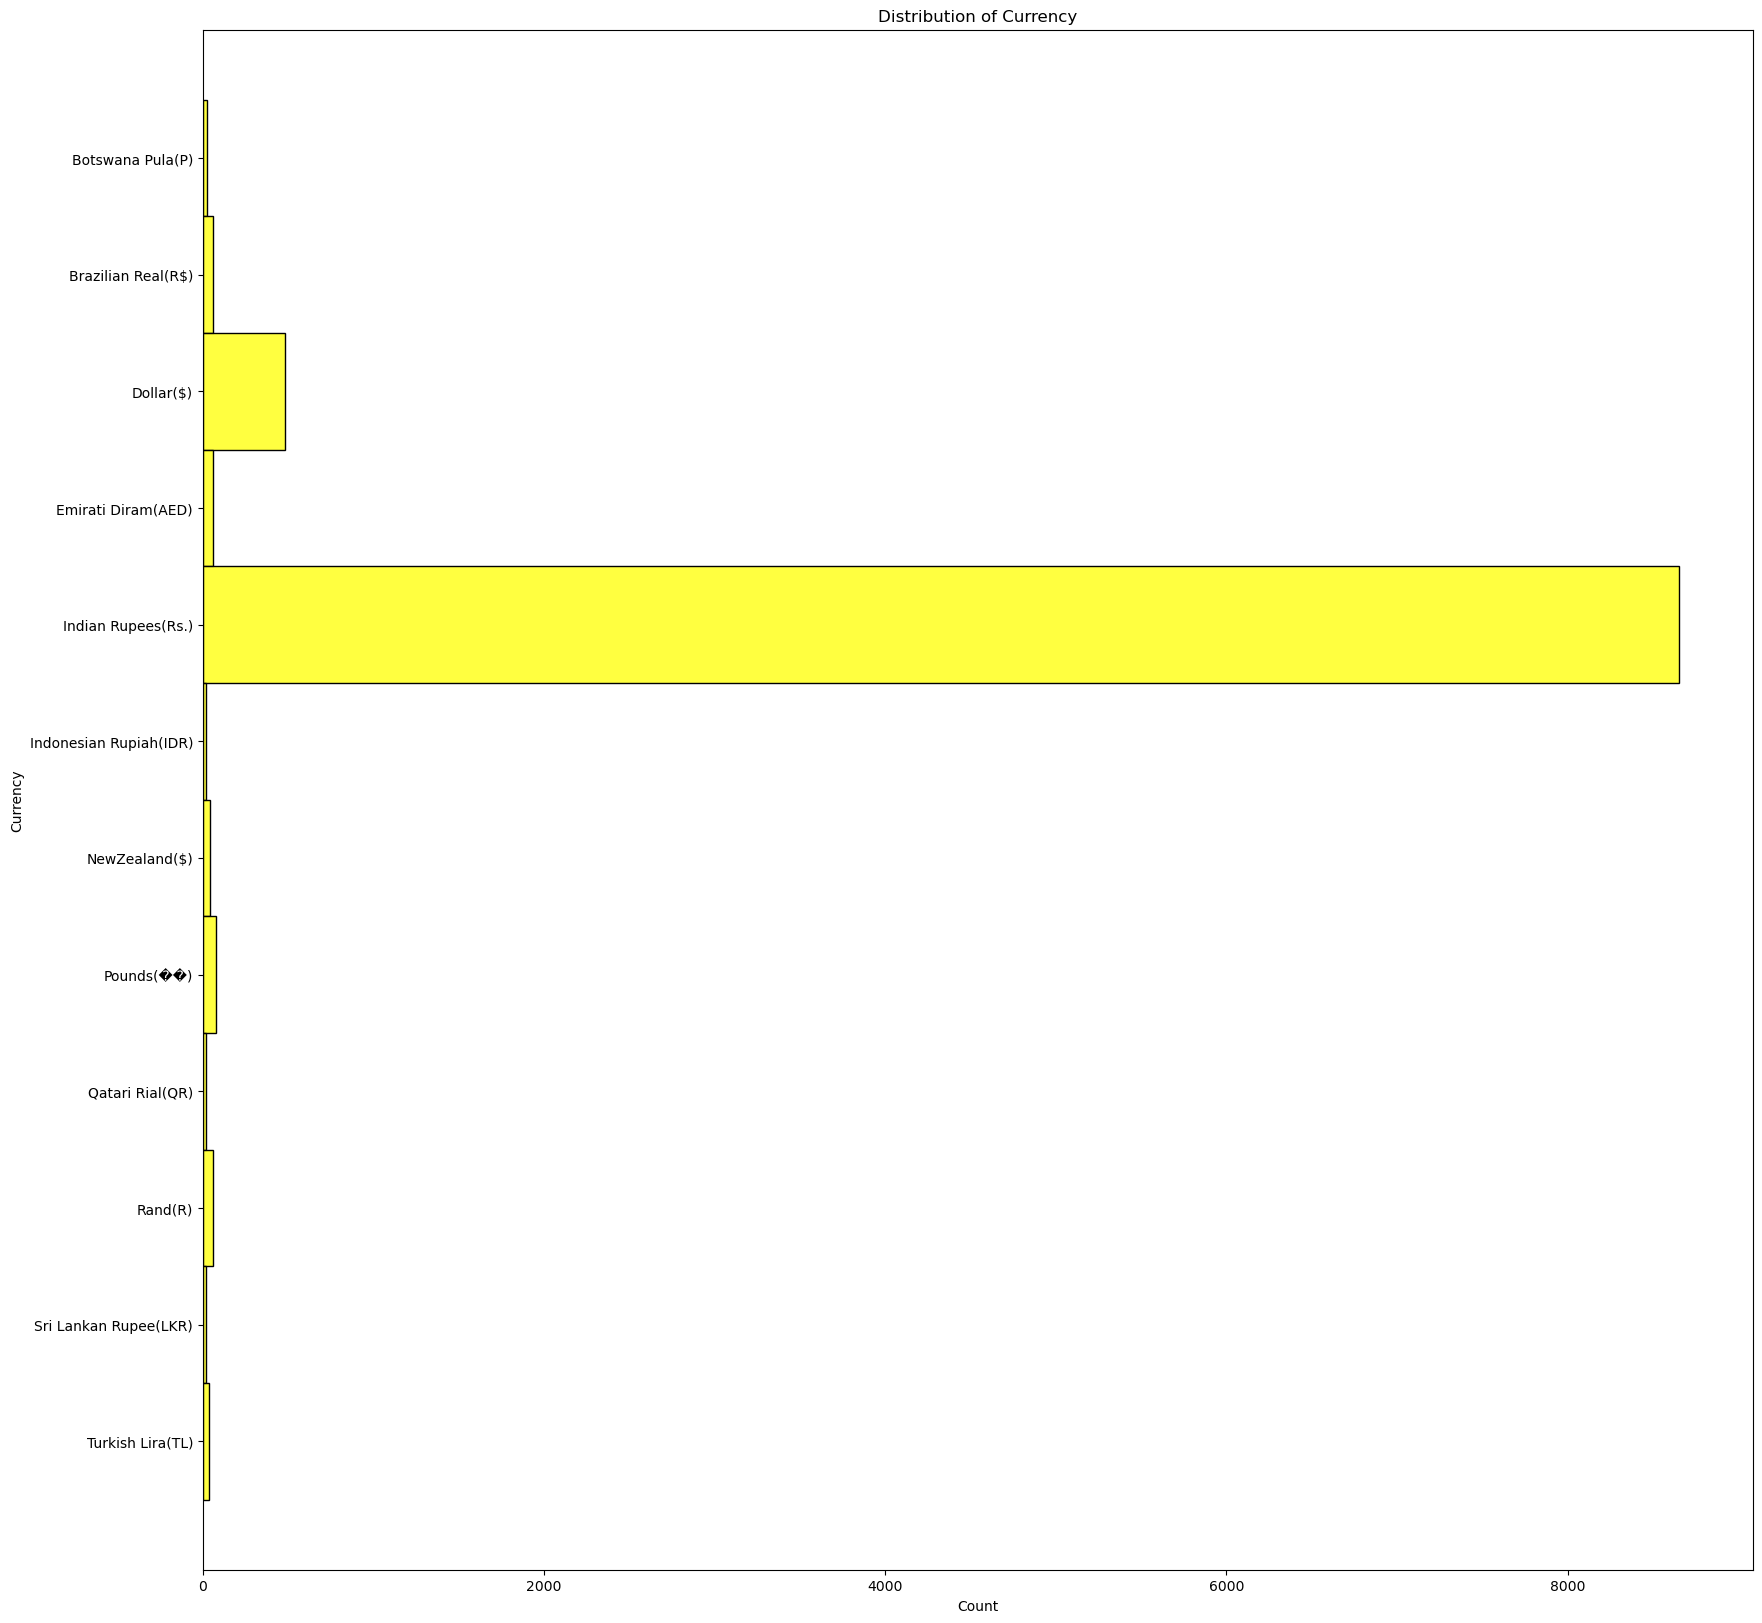

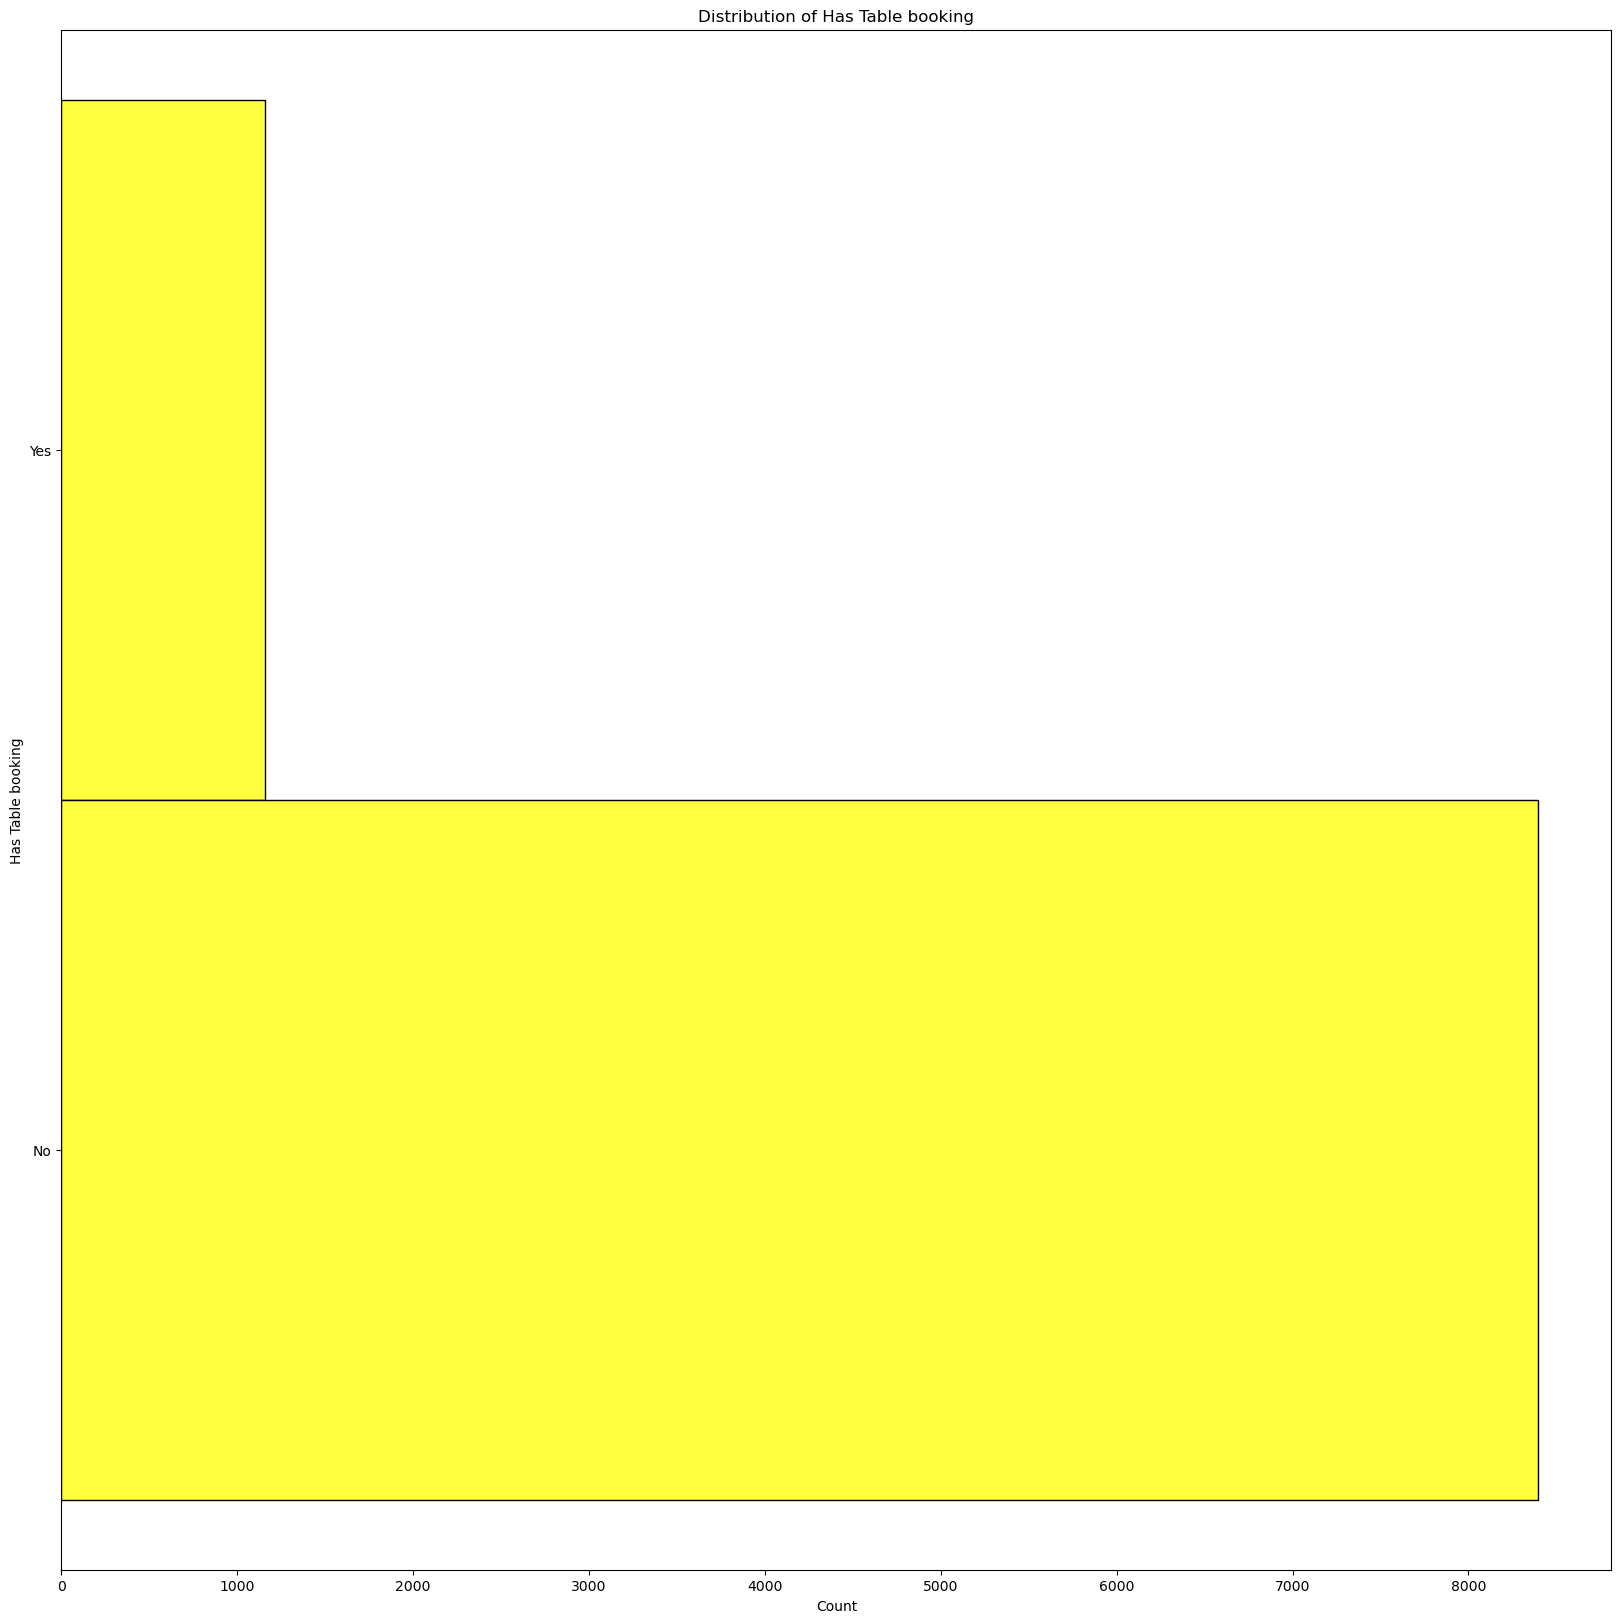

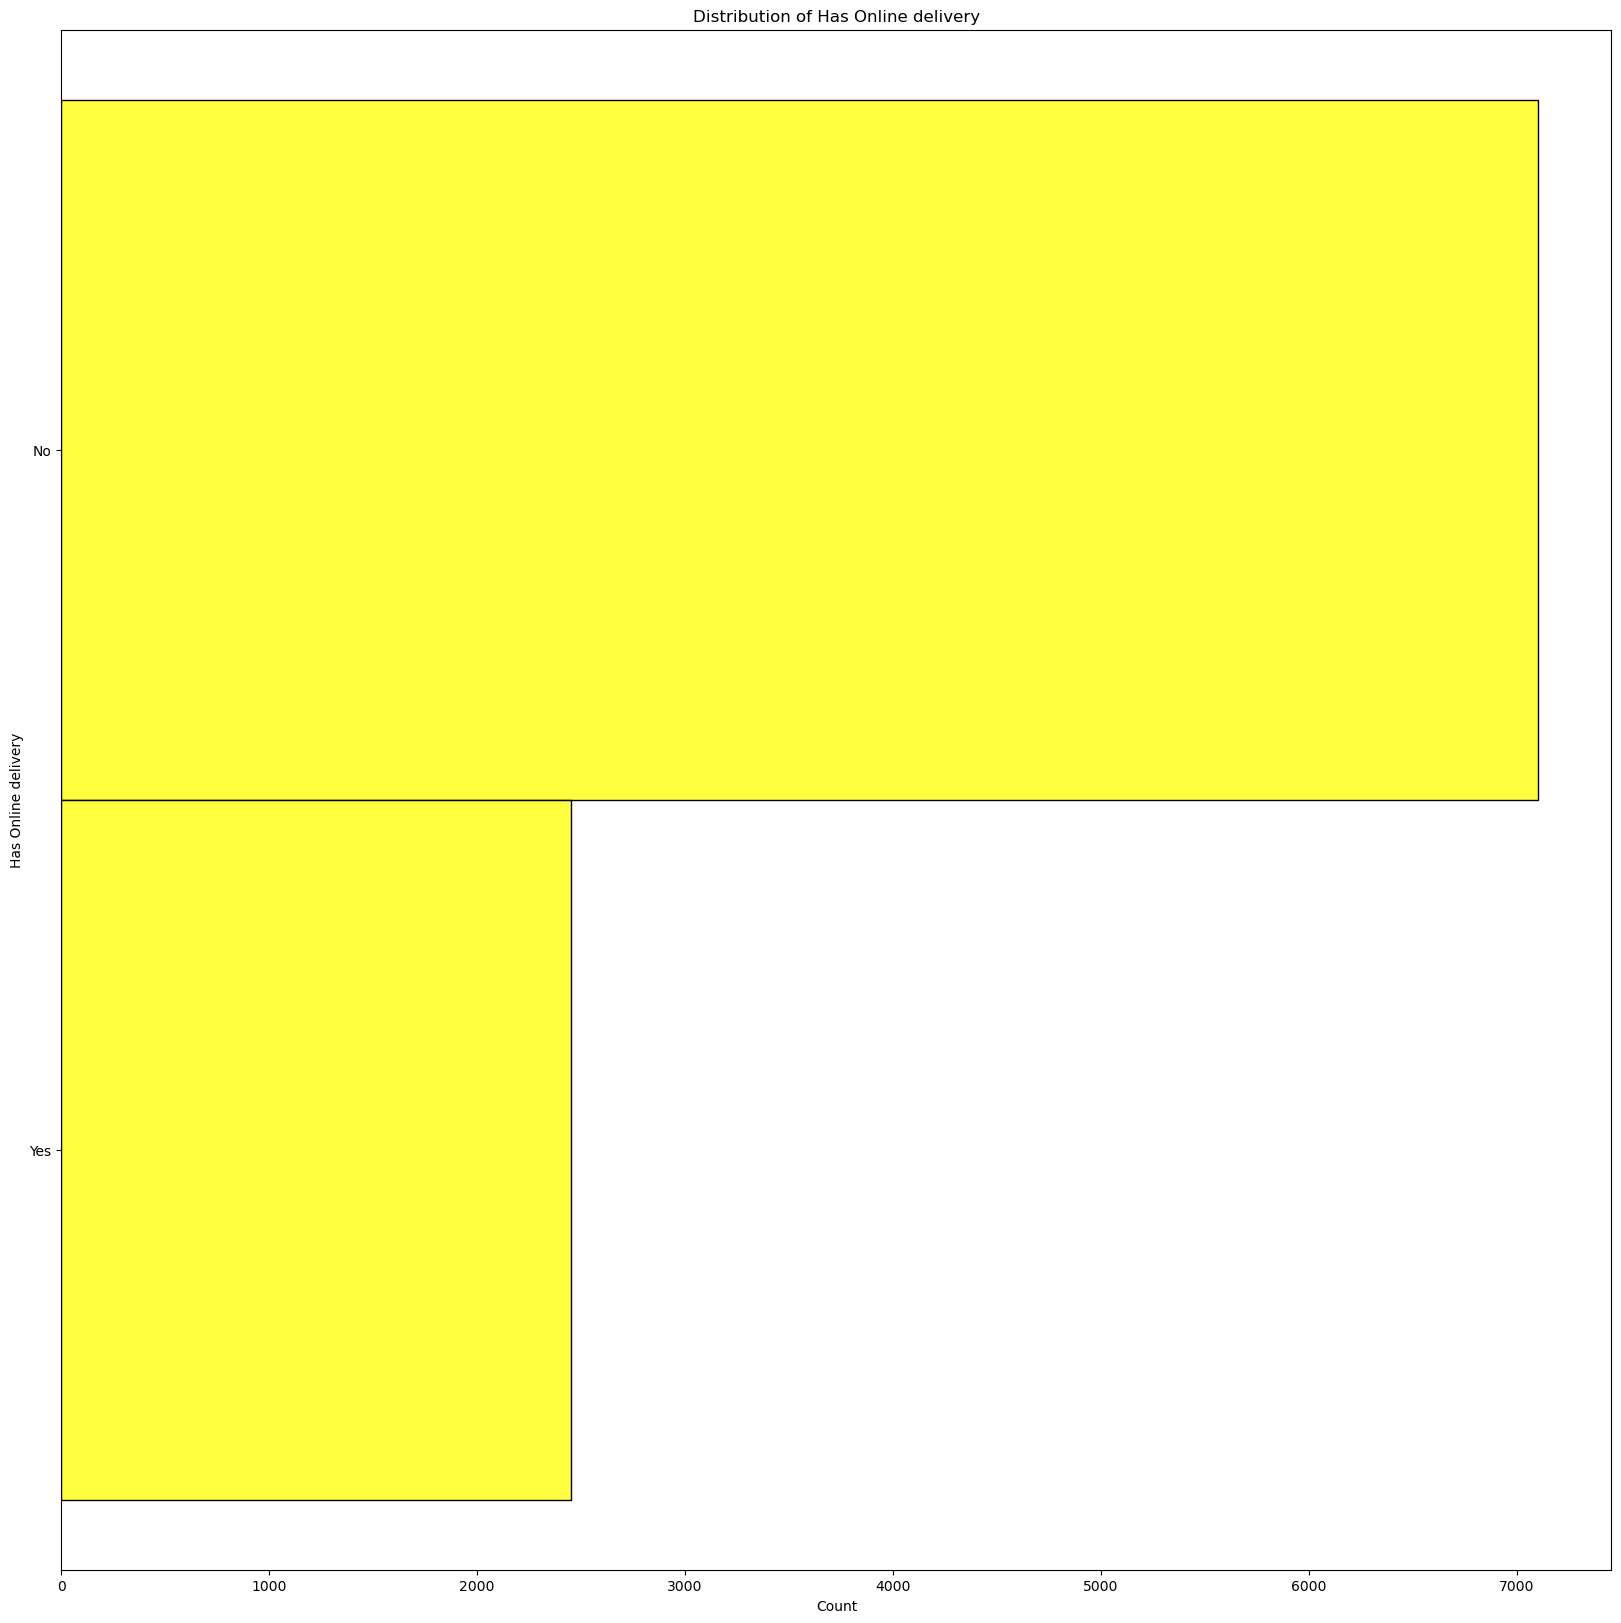

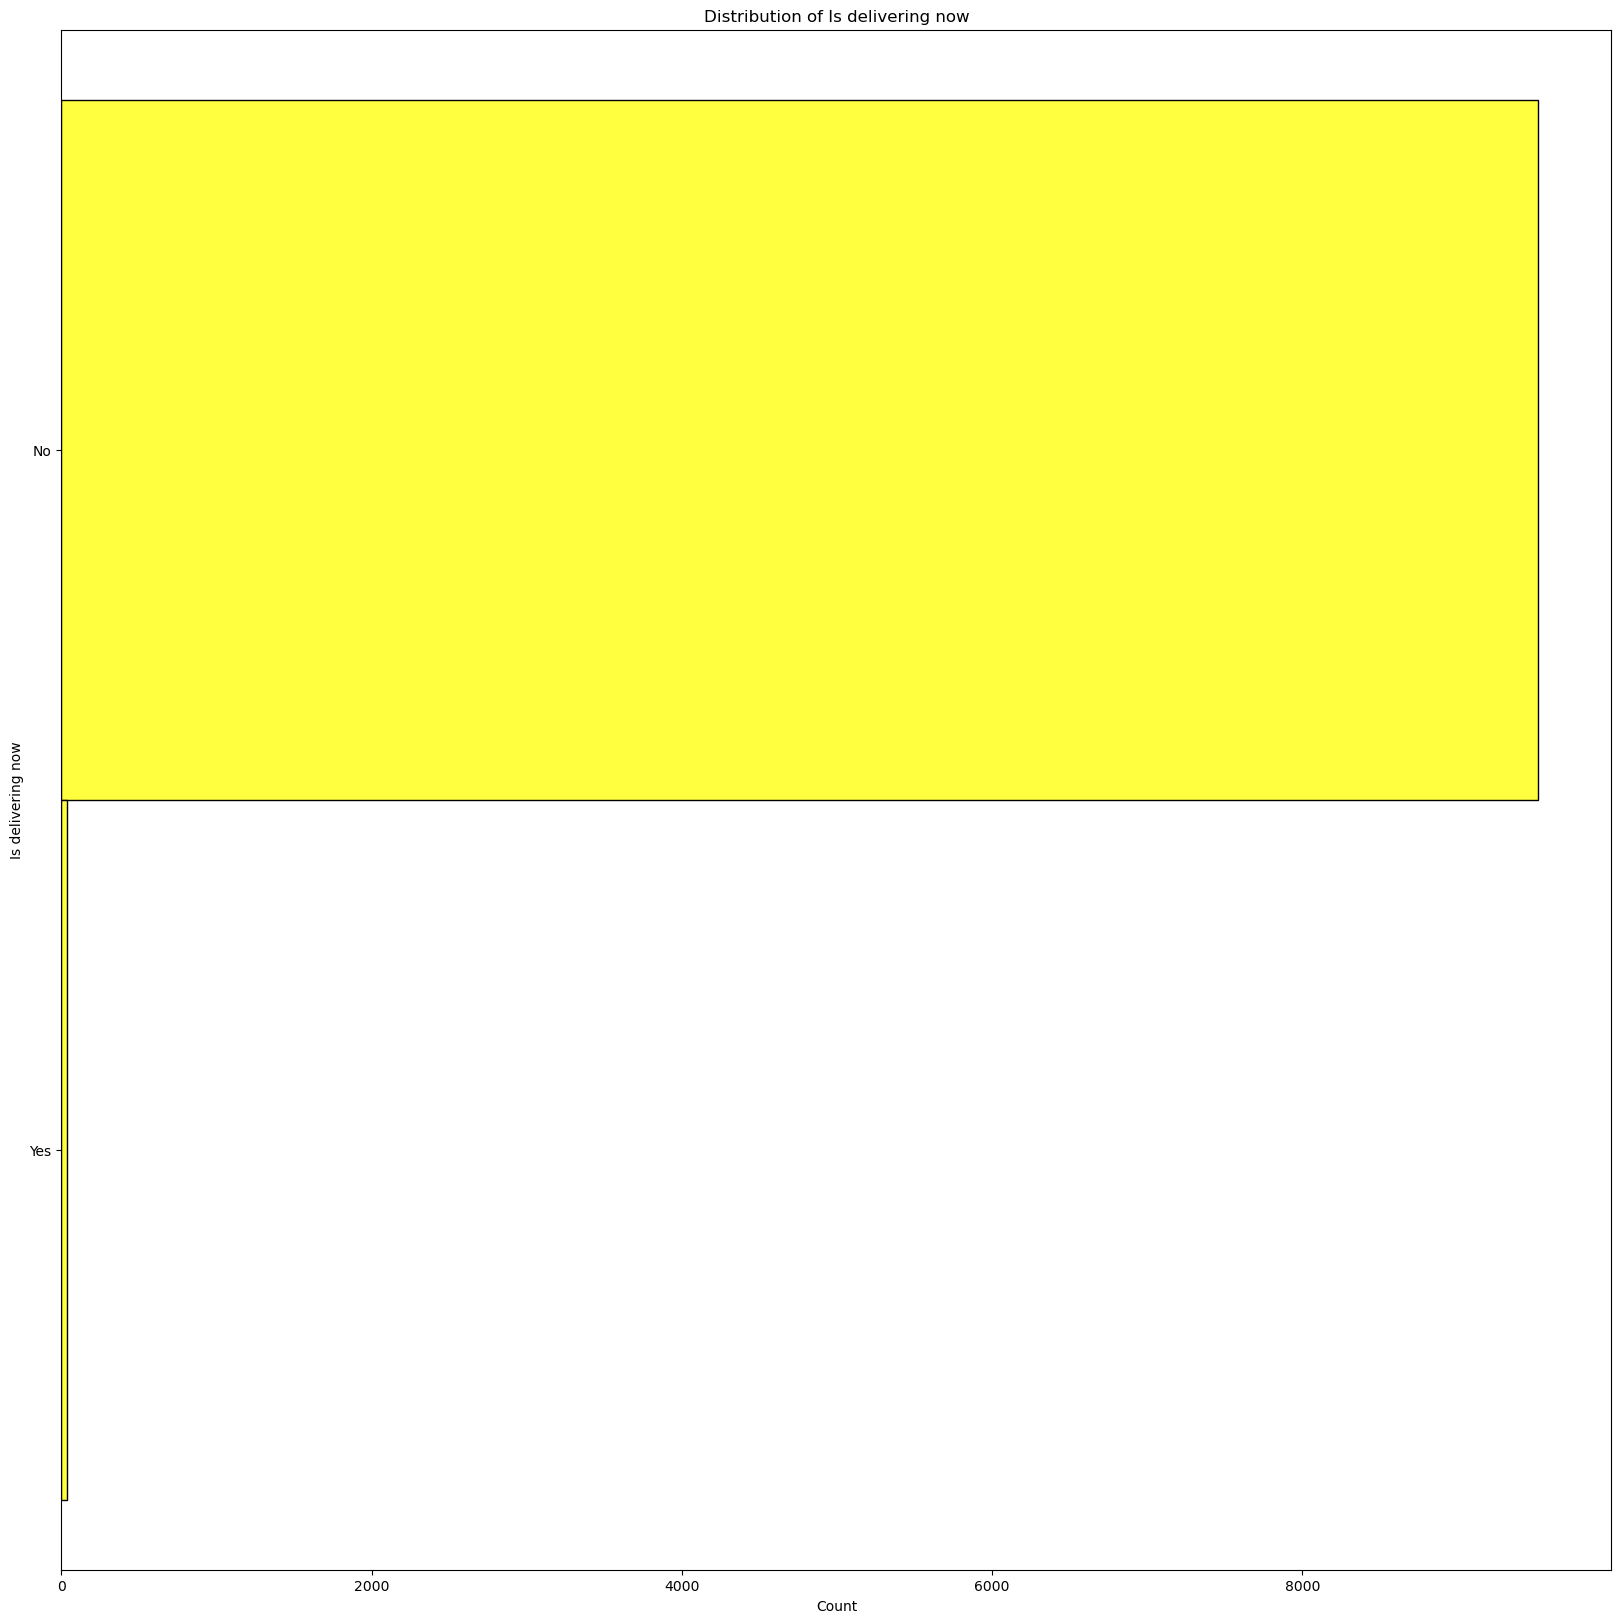

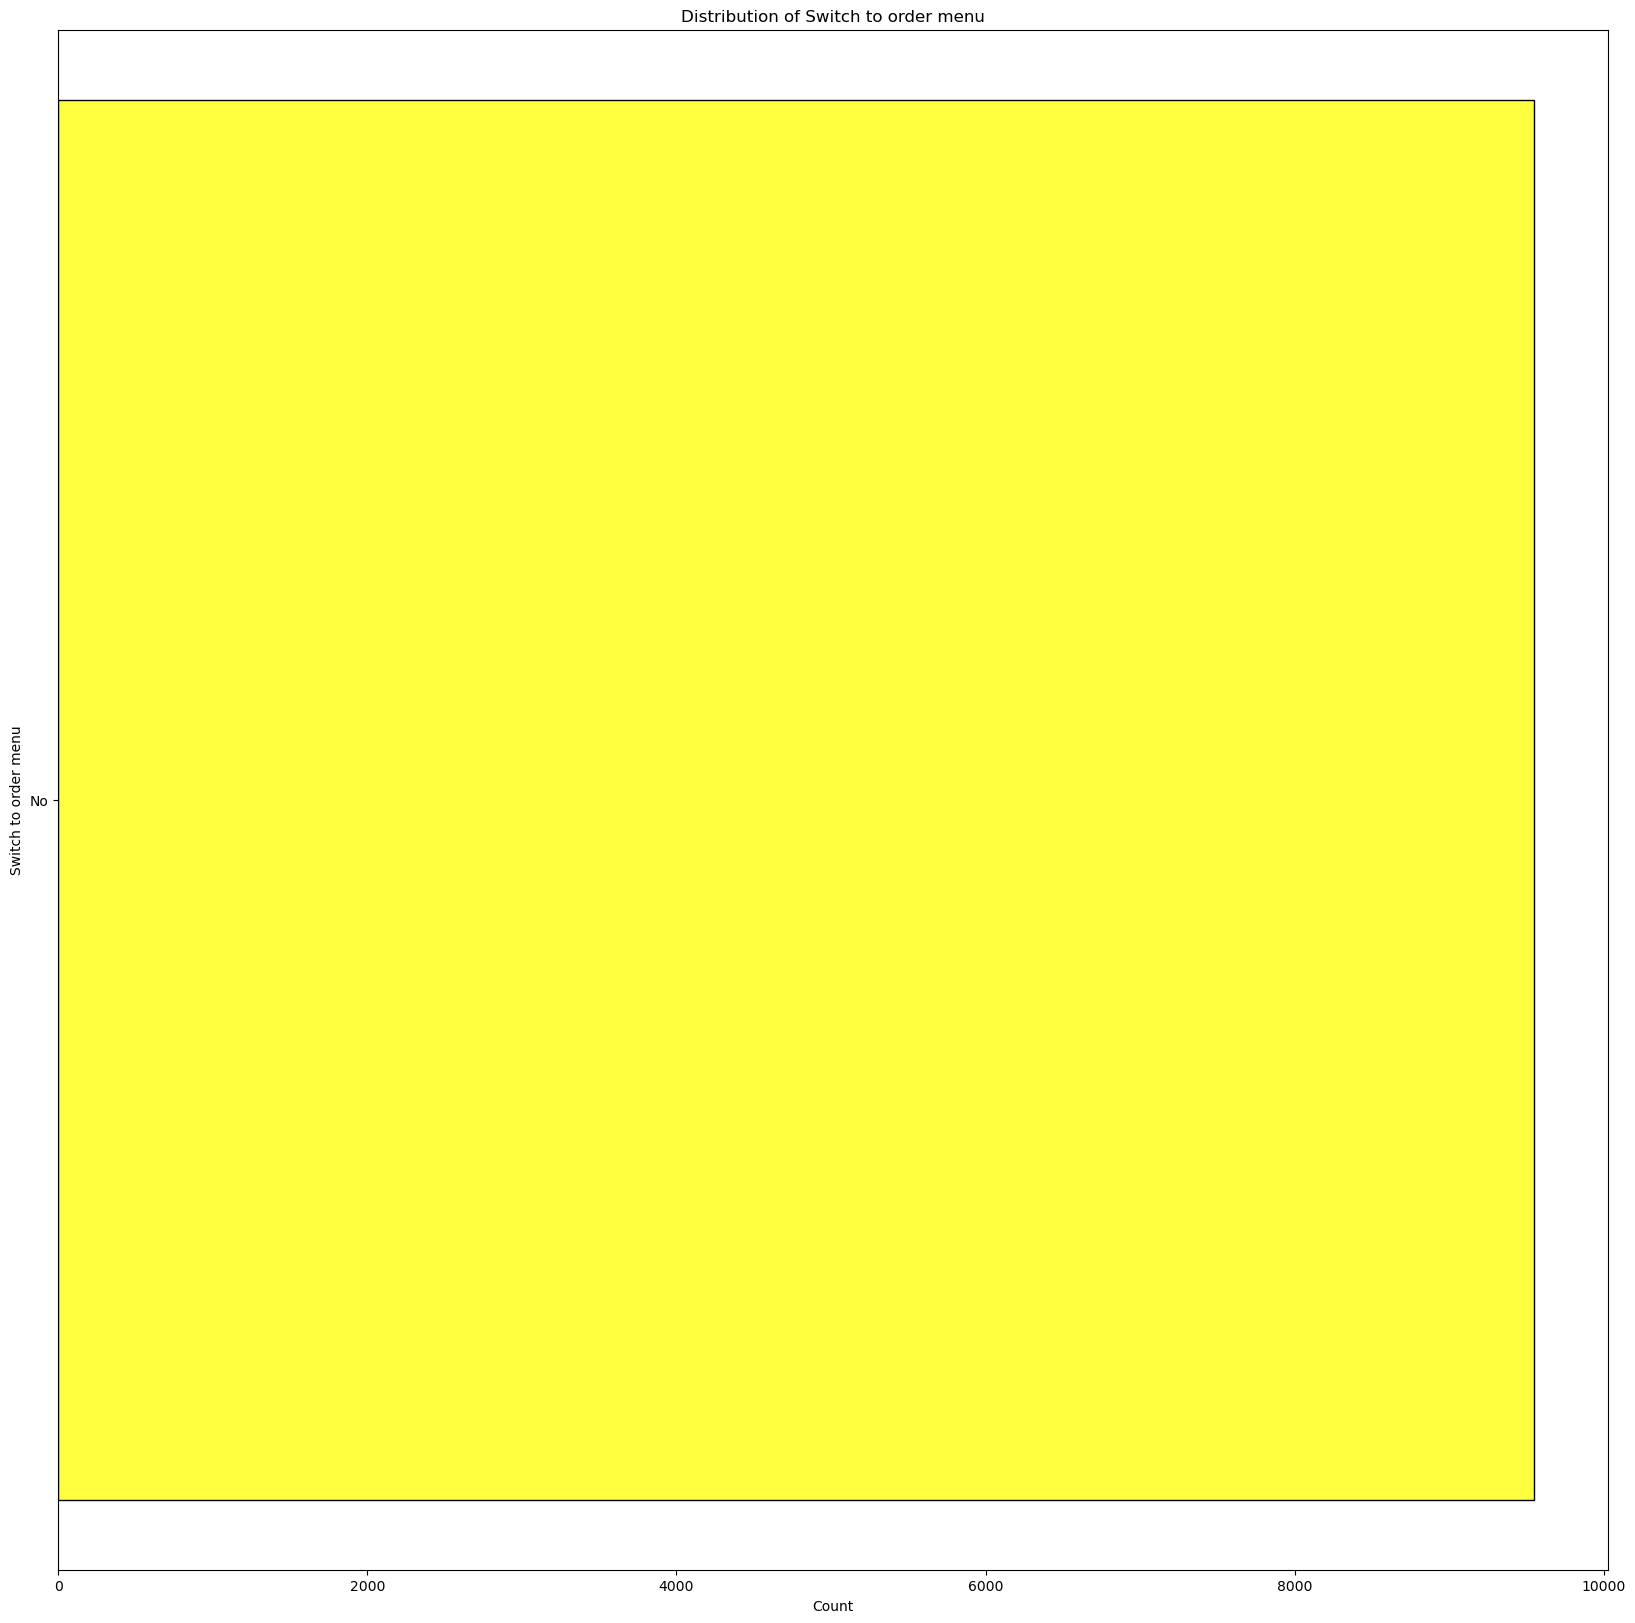

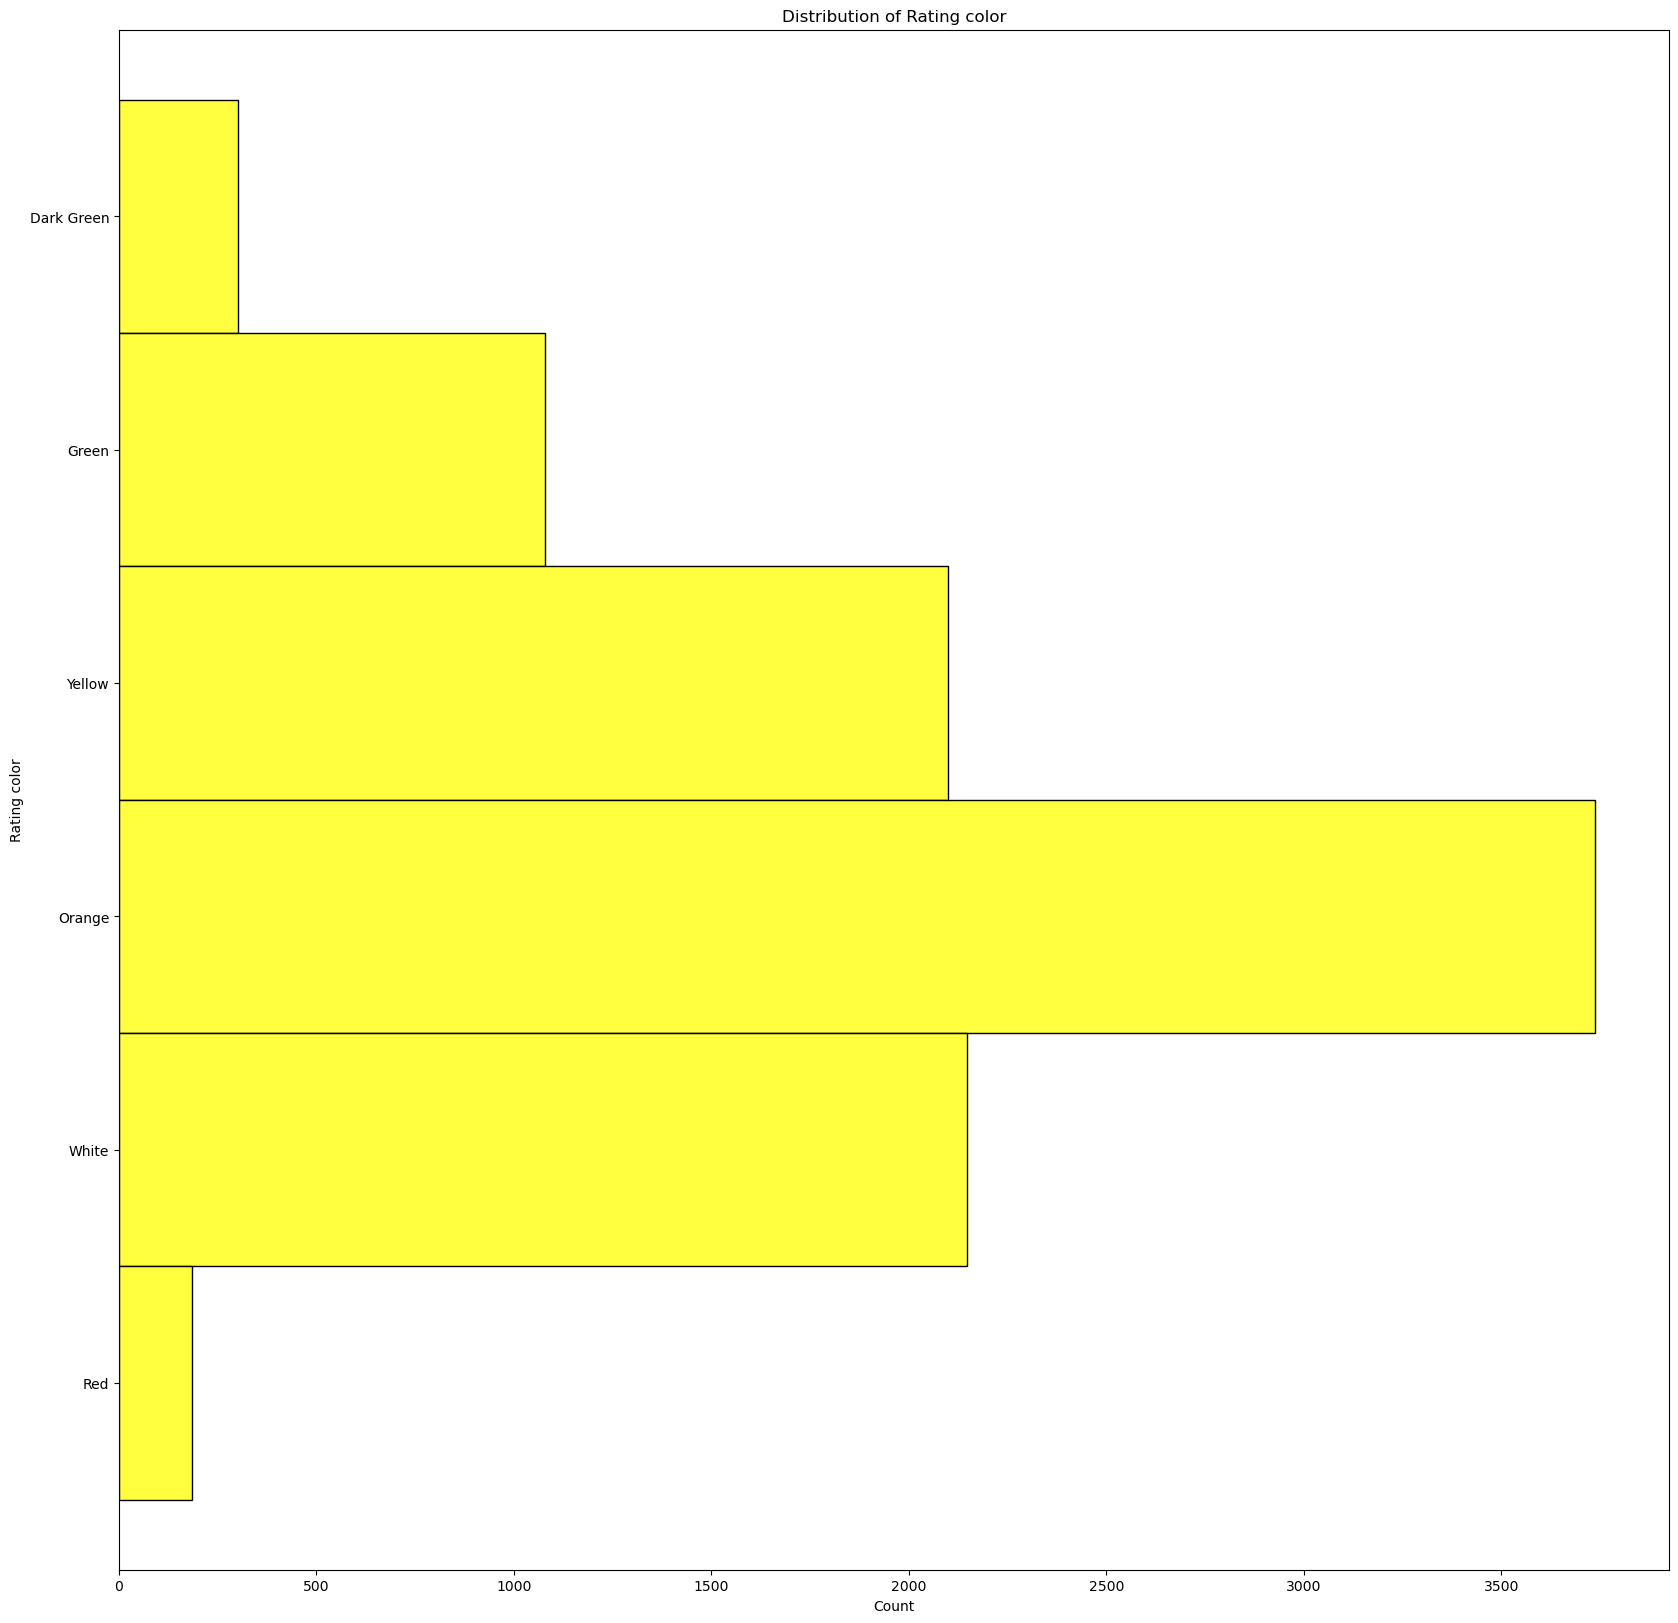

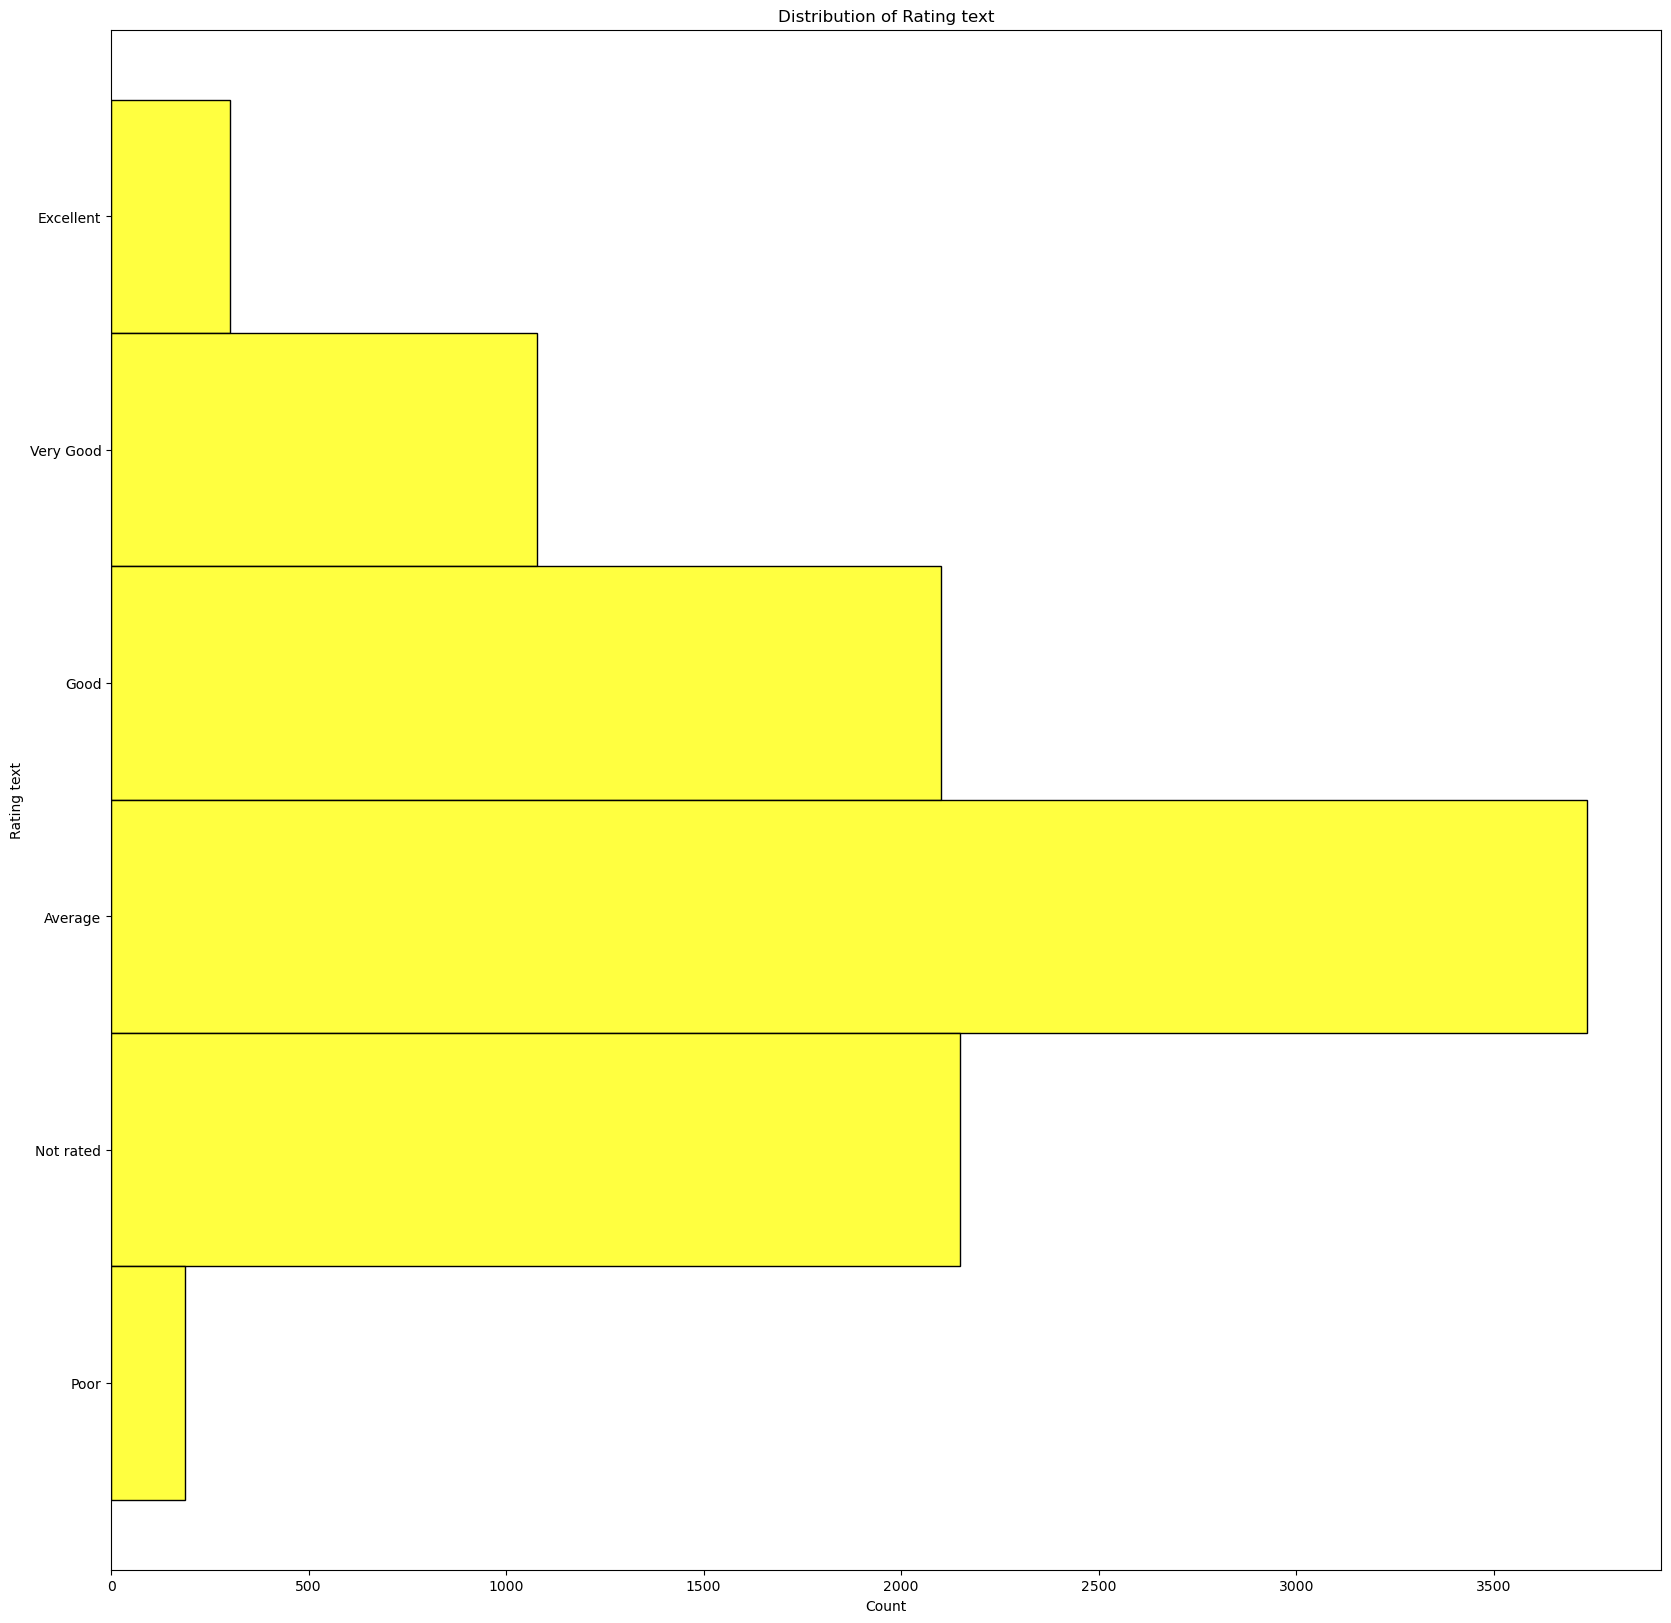

In [9]:
categorical_features= data.select_dtypes(exclude=np.number)
for col in categorical_features.columns:
    plt.figure(figsize=(20,20))
    sns.histplot(y=col,data=data, color='yellow')
    plt.title(f'Distribution of {col}')
    plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

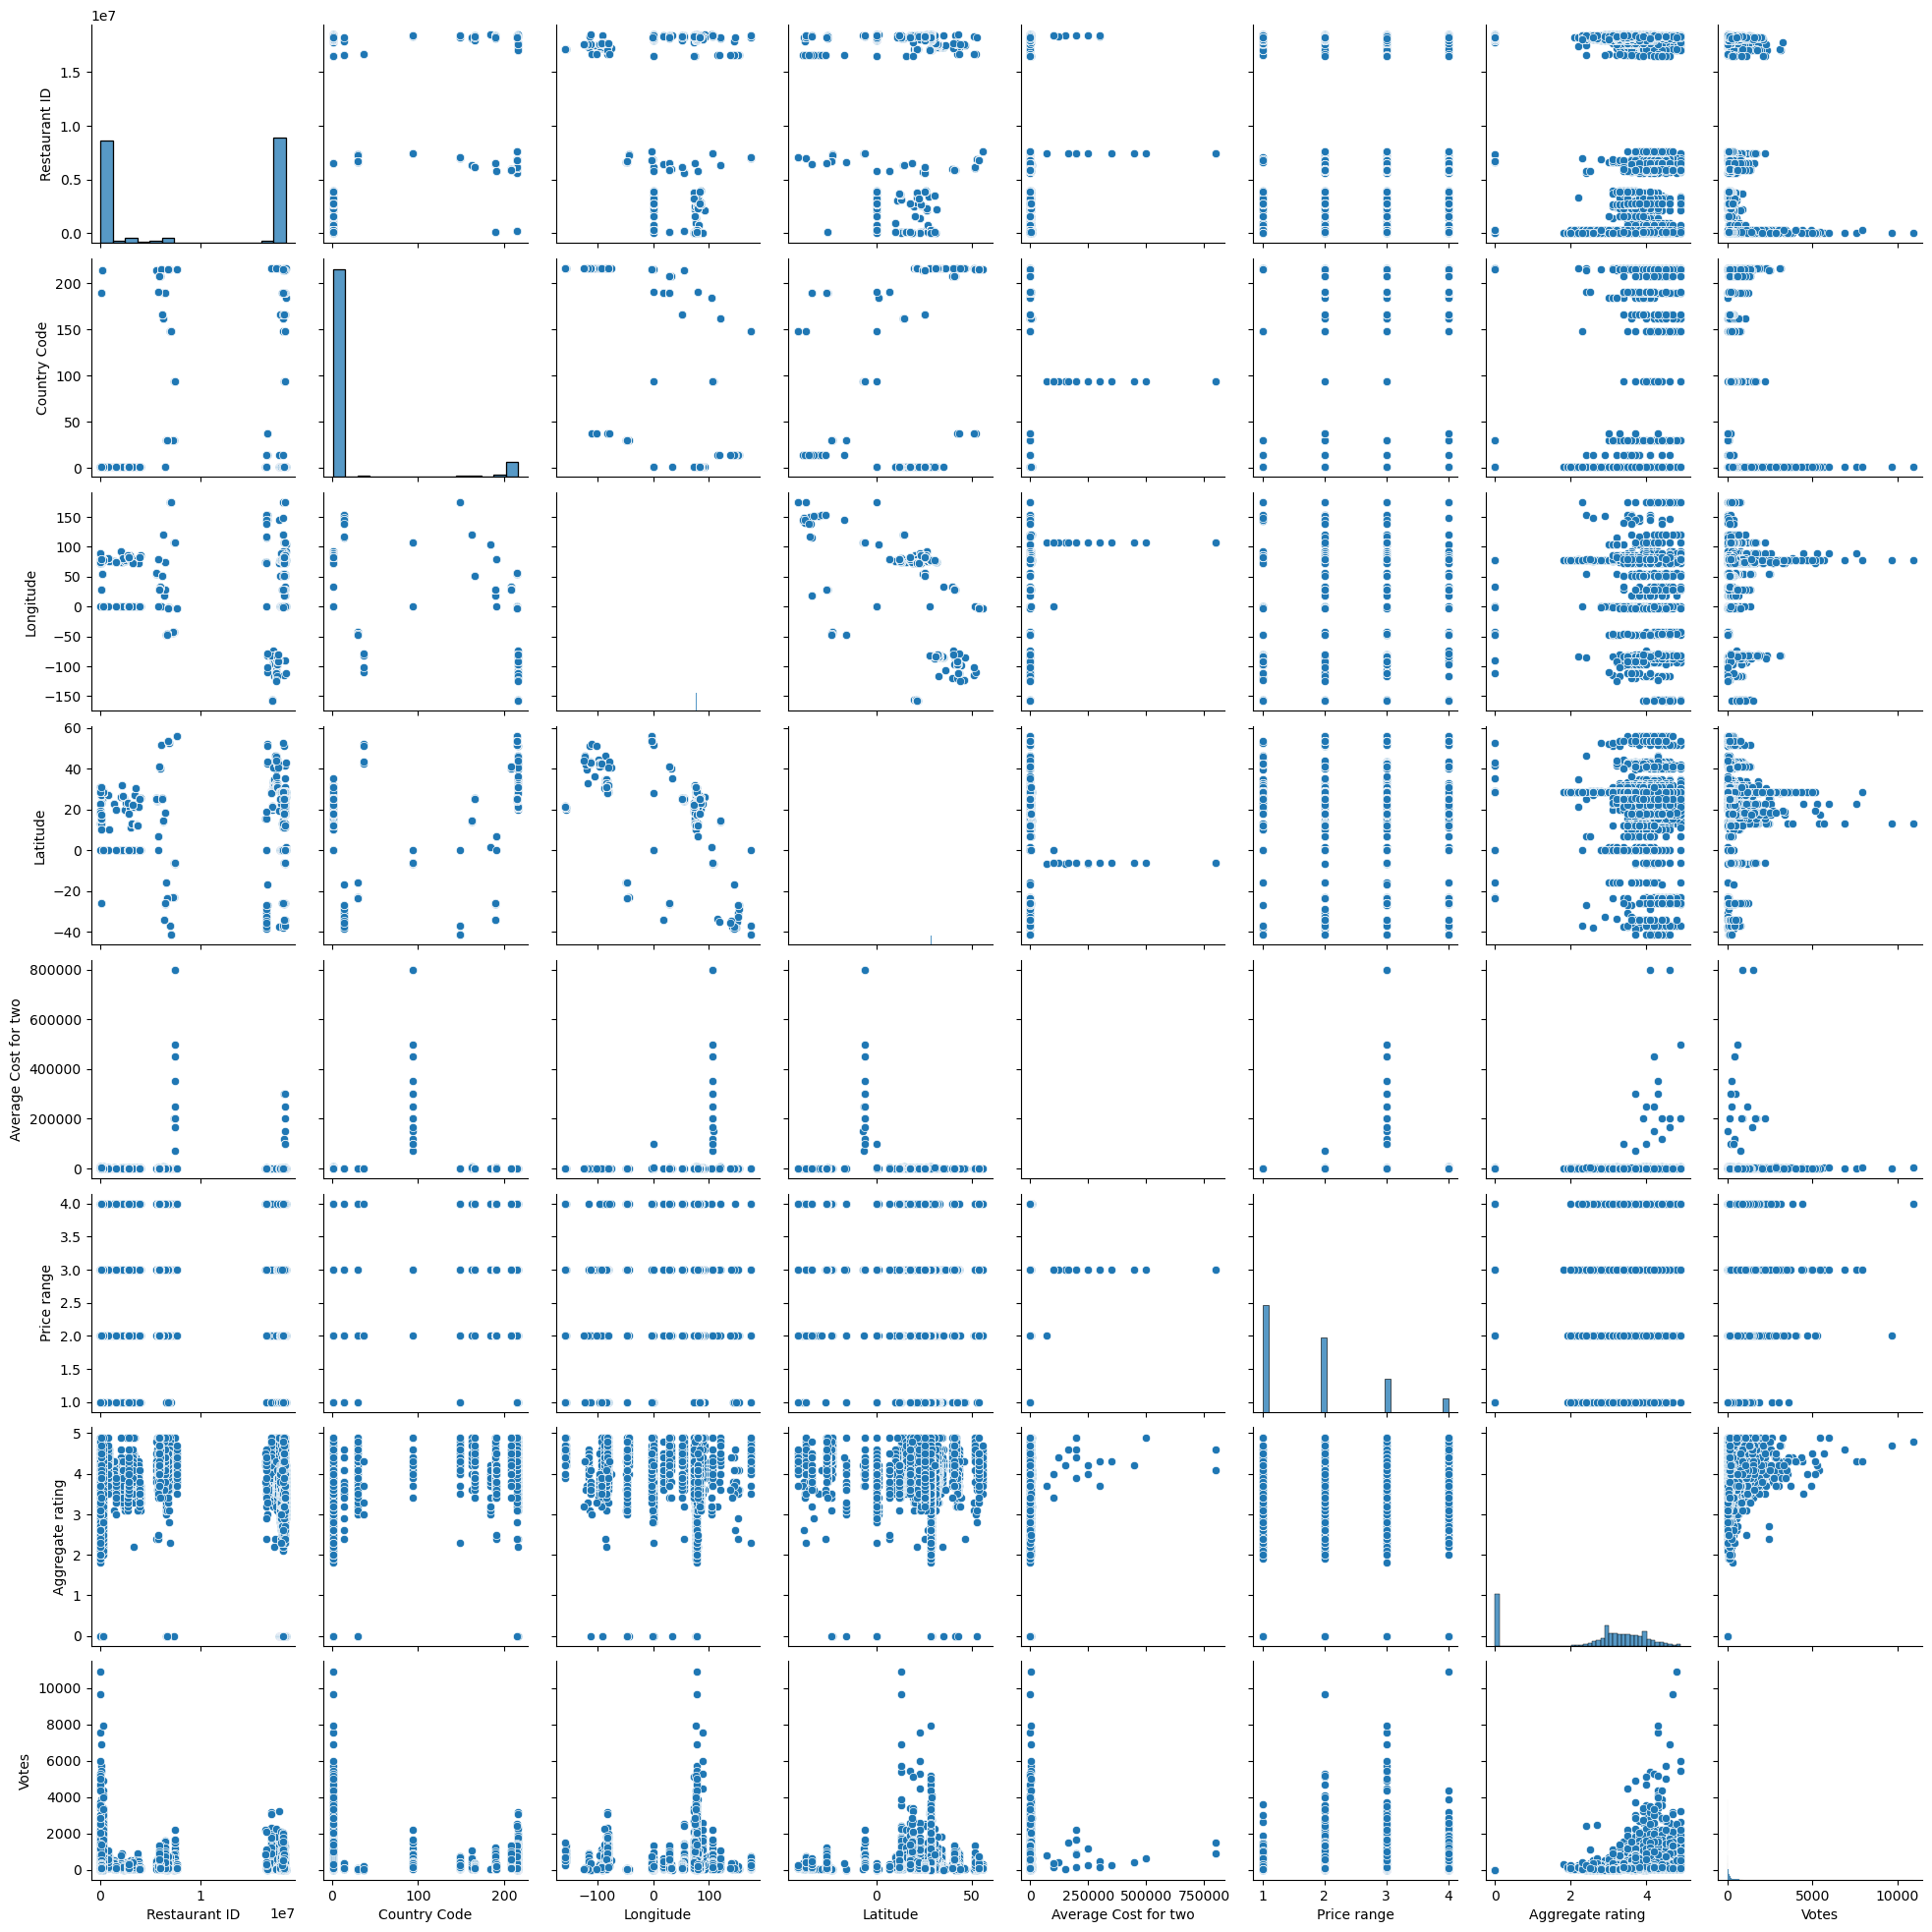

In [12]:
sns.pairplot(data[num_features.columns],palette="viridis")
plt.show()

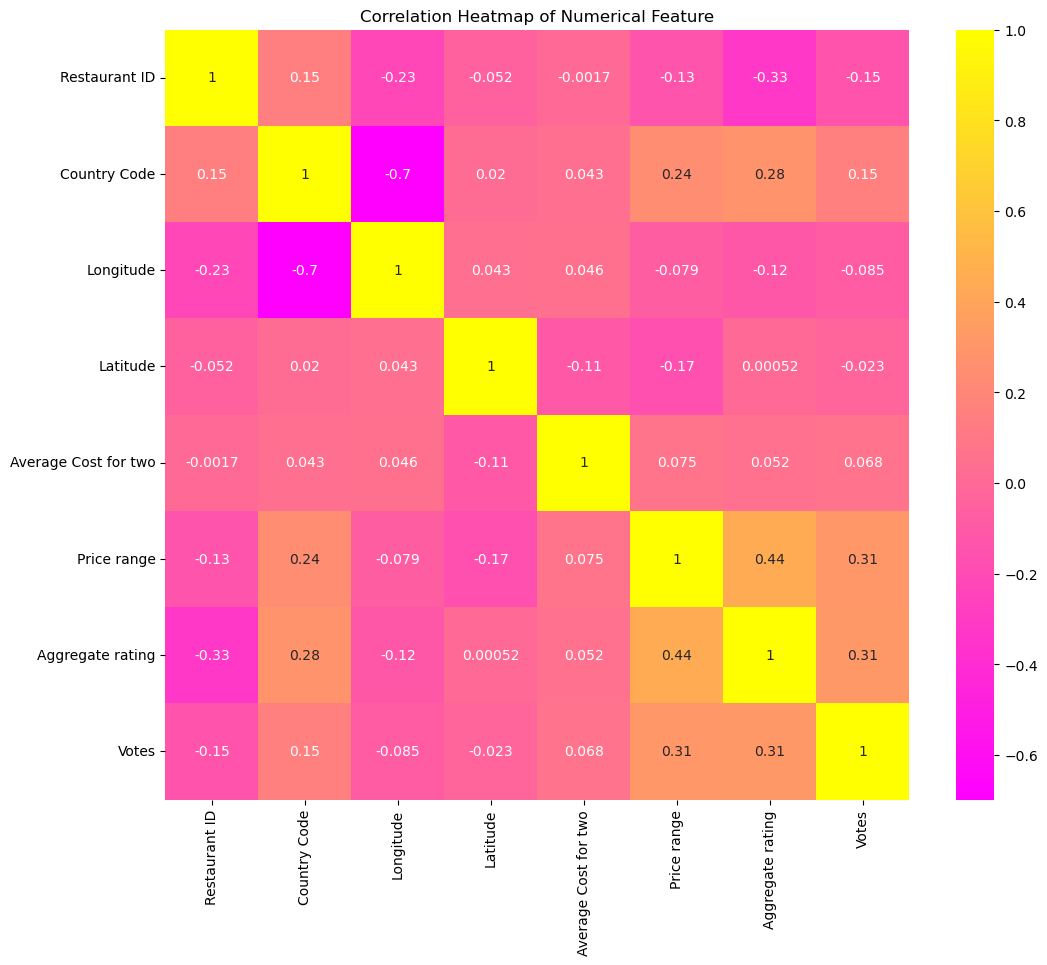

In [14]:
plt.figure(figsize=(12,10))
correlation_matrix=data[num_features.columns].corr()
sns.heatmap(correlation_matrix,annot=True,cmap = "spring")
plt.title('Correlation Heatmap of Numerical Feature')
plt.show()

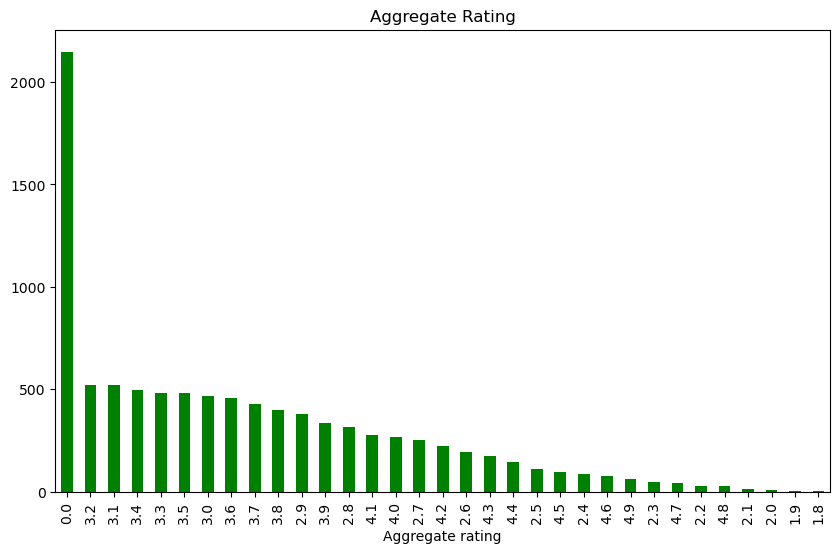

In [16]:
data["Aggregate rating"].value_counts().plot(kind='bar',figsize=(10,6),color='green')
plt.title('Aggregate Rating')
plt.show()

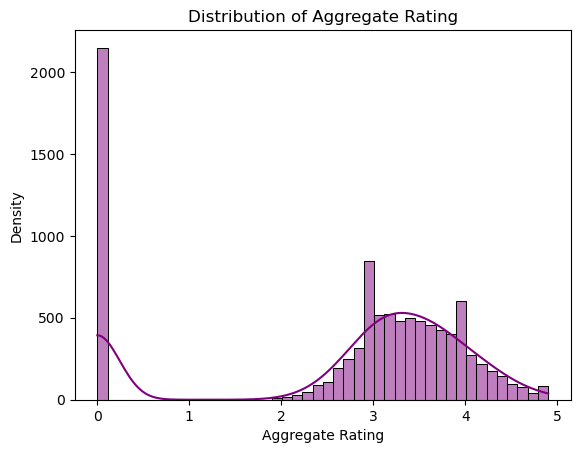

In [18]:
sns.histplot(data['Aggregate rating'],kde=True, color='purple')
plt.xlabel("Aggregate Rating")
plt.ylabel("Density")
plt.title("Distribution of Aggregate Rating")
plt.show()

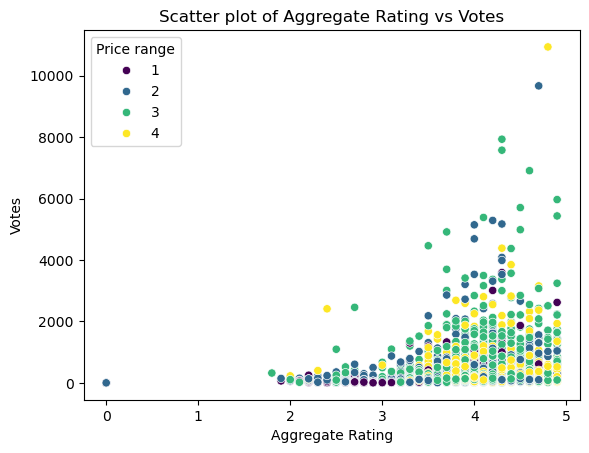

In [86]:
sns.scatterplot(x=data["Aggregate rating"],y=data["Votes"],hue=data["Price range"],palette="viridis")
plt.xlabel('Aggregate Rating')
plt.ylabel("Votes")
plt.title('Scatter plot of Aggregate Rating vs Votes')
plt.show()

In [33]:
col_list=data.columns.tolist()
print("Names of columns in the datasets are : ",col_list)

Names of columns in the datasets are :  ['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address', 'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines', 'Average Cost for two', 'Currency', 'Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu', 'Price range', 'Aggregate rating', 'Rating color', 'Rating text', 'Votes']


Remove the unwanted columns from the dataset

In [36]:
data1 = data[['Restaurant ID','Restaurant Name','Country Code','City','Address']]

In [38]:
data1

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                                                Address  
0     Third Floor, Century City Mall, Kalayaan Avenu...  
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...  
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...  
3     Third Floor, Mega Fashion Hall, SM Megamall, O...  
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...  
...                                                 ...  
9546  Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...  
9547  Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...  
9548  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...  
9549  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...  
9550  Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...  

[9551 rows x 5 columns]

In [40]:
#Cuisines columns are non - numeric so we have to drop it
data=data.drop("Cuisines",axis=1)

In [42]:
data

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...   
9547  Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...   
9548  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9550  Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karak�_y   
9547                                   Ko��uyolu   
9548                                 Kuru�_e��me   
9549                                 Kuru�_e��me   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karak�_y, ��stanbul   28.977392   
9547                               Ko��uyolu, ��stanbul   29.041297   
9548                             Kuru�_e��me, ��stanbul   29.034640   
9549                             Kuru�_e��me, ��stanbul   29.036019   
9550                                    Moda, ��stanbul   29.026016   

       Latitude  Average Cost for two          Currency Has Table booking  \
0     14.565443                  1100  Botswana Pula(P)               Yes   
1     14.553708                  1200  Botswana Pula(P)               Yes   
2     14.581404                  4000  Botswana Pula(P)               Yes   
3     14.585318                  1500  Botswana Pula(P)                No   
4     14.584450                  1500  Botswana Pula(P)               Yes   
...         ...                   ...               ...               ...   
9546  41.022793                    80  Turkish Lira(TL)                No   
9547  41.009847                   105  Turkish Lira(TL)                No   
9548  41.055817                   170  Turkish Lira(TL)                No   
9549  41.057979                   120  Turkish Lira(TL)                No   

In [44]:
import warnings
warnings.filterwarnings('ignore')

In [46]:
from sklearn.model_selection import train_test_split

In [47]:
x=data.drop('Aggregate rating', axis=1)
y=data['Aggregate rating']

encoding categorical data using one-hot encoding

In [49]:
x_encode=pd.get_dummies(x,drop_first=True)

In [50]:
x

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730               Naml۱ Gurme           208         ��stanbul   
9547        5908749              Ceviz A��ac۱           208         ��stanbul   
9548        5915807                     Huqqa           208         ��stanbul   
9549        5916112               A���k Kahve           208         ��stanbul   
9550        5927402  Walter's Coffee Roastery           208         ��stanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...   
9547  Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...   
9548  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...   
9550  Cafea��a Mahallesi, Bademalt۱ Sokak, No 21/B, ...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karak�_y   
9547                                   Ko��uyolu   
9548                                 Kuru�_e��me   
9549                                 Kuru�_e��me   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karak�_y, ��stanbul   28.977392   
9547                               Ko��uyolu, ��stanbul   29.041297   
9548                             Kuru�_e��me, ��stanbul   29.034640   
9549                             Kuru�_e��me, ��stanbul   29.036019   
9550                                    Moda, ��stanbul   29.026016   

       Latitude  Average Cost for two          Currency Has Table booking  \
0     14.565443                  1100  Botswana Pula(P)               Yes   
1     14.553708                  1200  Botswana Pula(P)               Yes   
2     14.581404                  4000  Botswana Pula(P)               Yes   
3     14.585318                  1500  Botswana Pula(P)                No   
4     14.584450                  1500  Botswana Pula(P)               Yes   
...         ...                   ...               ...               ...   
9546  41.022793                    80  Turkish Lira(TL)                No   
9547  41.009847                   105  Turkish Lira(TL)                No   
9548  41.055817                   170  Turkish Lira(TL)                No   
9549  41.057979                   120  Turkish Lira(TL)                No   

In [55]:
y

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9551, dtype: float64

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x_encode,y,test_size=0.25,random_state=0)

In [59]:
x_train

Restaurant ID  Country Code  Longitude   Latitude  Average Cost for two  \
785         2900012             1  85.818494  20.292363                  1500   
6883       18414500             1   0.000000   0.000000                   300   
7319         307418             1  77.223136  28.571265                   600   
1142         130275             1  73.743606  15.585658                  1100   
2916       18239781             1  77.248612  28.540084                   300   
...             ...           ...        ...        ...                   ...   
7891         300461             1  77.079268  28.638455                   300   
9225        3200015             1  73.169083  22.310329                   600   
4859       18410302             1   0.000000   0.000000                   500   
3264         303215             1  77.230681  28.573417                   200   
2732       18216896             1  77.178217  28.693567                   550   

      Price range  Votes  Restaurant Name_#Dilliwaala6  \
785             3    345                         False   
6883            1      0                         False   
7319            2     59                         False   
1142            4    415                         False   
2916            1      7                         False   
...           ...    ...                           ...   
7891            1     33                         False   
9225            2    191                         False   
4859            2      0                         False   
3264            1    169                         False   
2732            2     41                         False   

      Restaurant Name_#InstaFreeze  Restaurant Name_#OFF Campus  ...  \
785                          False                        False  ...   
6883                         False                        False  ...   
7319                         False                        False  ...   
1142                         False                        False  ...   
2916                         False                        False  ...   
...                            ...                          ...  ...   
7891                         False                        False  ...   
9225                         False                        False  ...   
4859                         False                        False  ...   
3264                         False                        False  ...   
2732                         False                        False  ...   

      Rating color_Green  Rating color_Orange  Rating color_Red  \
785                 True                False             False   
6883               False                False             False   
7319               False                False              True   
1142               False                False             False   
2916               False                 True             False   
...                  ...                  ...               ...   
7891               False                 True             False   
9225                True                False             False   
4859               False                False             False   
3264                True                False             False   
2732               False                 True             False   

      Rating color_White  Rating color_Yellow  Rating text_Excellent  \
785                False                False                  False   
6883                True                False                  False   
7319               False                False                  False   
1142               False                False                   True   
2916               False                False                  False   
...                  ...                  ...                    ...   
7891               False                False                  False   
9225               False                False                  False   
4859              

In [60]:
x_test

Restaurant ID  Country Code  Longitude   Latitude  Average Cost for two  \
1746       18471259             1  77.048274  28.472892                   600   
3034             66             1  77.221003  28.633679                  2000   
1638       18391159             1  77.097590  28.451147                   600   
6078       18231755             1  77.081809  28.599076                   200   
5584       18449786             1  77.218771  28.709168                   100   
...             ...           ...        ...        ...                   ...   
1888         313456             1   0.000000   0.000000                   350   
7014       18355138             1  77.168557  28.587647                   300   
5845           5528             1  77.251516  28.547879                   150   
5432           3207             1  77.220222  28.529549                  2000   
6314         307444             1  77.135978  28.683691                   500   

      Price range  Votes  Restaurant Name_#Dilliwaala6  \
1746            2      8                         False   
3034            4    706                         False   
1638            2     33                         False   
6078            1      1                         False   
5584            1      0                         False   
...           ...    ...                           ...   
1888            1      9                         False   
7014            1     26                         False   
5845            1      1                         False   
5432            4    220                         False   
6314            2     37                         False   

      Restaurant Name_#InstaFreeze  Restaurant Name_#OFF Campus  ...  \
1746                         False                        False  ...   
3034                         False                        False  ...   
1638                         False                        False  ...   
6078                         False                        False  ...   
5584                         False                        False  ...   
...                            ...                          ...  ...   
1888                         False                        False  ...   
7014                         False                        False  ...   
5845                         False                        False  ...   
5432                         False                        False  ...   
6314                         False                        False  ...   

      Rating color_Green  Rating color_Orange  Rating color_Red  \
1746               False                 True             False   
3034               False                False             False   
1638               False                False             False   
6078               False                False             False   
5584               False                False             False   
...                  ...                  ...               ...   
1888               False                 True             False   
7014               False                False             False   
5845               False                False             False   
5432               False                 True             False   
6314               False                False              True   

      Rating color_White  Rating color_Yellow  Rating text_Excellent  \
1746               False                False                  False   
3034               False                 True                  False   
1638               False                 True                  False   
6078                True                False                  False   
5584                True                False                  False   
...                  ...                  ...                    ...   
1888               False                False                  False   
7014               False                 True                  False   
5845              

In [63]:
y_train

785     4.3
6883    0.0
7319    2.3
1142    4.8
2916    3.1
       ... 
7891    3.4
9225    4.0
4859    0.0
3264    4.0
2732    2.5
Name: Aggregate rating, Length: 7163, dtype: float64

In [65]:
y_test

1746    3.1
3034    3.5
1638    3.7
6078    0.0
5584    0.0
       ... 
1888    3.1
7014    3.7
5845    0.0
5432    3.4
6314    2.4
Name: Aggregate rating, Length: 2388, dtype: float64

In [67]:
print("X_Train : ",x_train.shape)
print("X_Test : ",x_test.shape)
print("Y_Train : ",y_train.shape)
print("Y_Train : ",y_train.shape)

X_Train :  (7163, 19004)
X_Test :  (2388, 19004)
Y_Train :  (7163,)
Y_Train :  (7163,)


Applying Machine Learning Algorithm

In [70]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
decision_tree_model=DecisionTreeRegressor()

Model Training

In [77]:
decision_tree_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [79]:
y_pred = decision_tree_model.predict(x_test)

In [81]:
y_pred

array([3. , 3.9, 3.6, ..., 0. , 3.4, 2.3])

model_evaluation

In [84]:
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

mean_squared_error

In [87]:
print("Mean Squared Error : ",mean_squared_error(y_test,y_pred))

Mean Squared Error :  0.052068676716917915


r2_score

In [90]:
print("R2 Score :", r2_score(y_test,y_pred))

R2 Score : 0.9772168963895276


#mean absolute  error

In [93]:
print("Mean Absolute Error : ",mean_absolute_error(y_test,y_pred))

Mean Absolute Error :  0.14028475711892796


root mean squared error

In [96]:
print("Root mean squared error: ",np.sqrt(mean_squared_error(y_test,y_pred)))

Root mean squared error:  0.22818561899672363


In [100]:
importance = decision_tree_model.feature_importances_
feature_names=x_encode.columns

#Generating table for feature, importance and rating

In [103]:
feature_importance=pd.DataFrame({"Feature":feature_names,"Importance":importance})


In [105]:
feature_importance

Feature  Importance
0              Restaurant ID    0.002077
1               Country Code    0.000027
2                  Longitude    0.001459
3                   Latitude    0.001147
4       Average Cost for two    0.000717
...                      ...         ...
18999  Rating text_Excellent    0.000000
19000       Rating text_Good    0.013080
19001  Rating text_Not rated    0.898245
19002       Rating text_Poor    0.020652
19003  Rating text_Very Good    0.000000

[19004 rows x 2 columns]

sorted order of influencial feature

In [110]:
sorted_important_feature=feature_importance.sort_values(by="Importance",ascending=False)

In [112]:
sorted_important_feature

Feature    Importance
19001                              Rating text_Not rated  8.982446e-01
18995                                Rating color_Orange  5.175303e-02
19002                                   Rating text_Poor  2.065217e-02
19000                                   Rating text_Good  1.308016e-02
18994                                 Rating color_Green  2.608169e-03
...                                                  ...           ...
15089                         Address_Sector 53, Gurgaon -3.229410e-19
7455                                      City_Allahabad -4.305881e-19
12392  Address_F-8, Ground Floor, Main Market Road, K... -6.458821e-19
14396  Address_Opposite Laxmi Vaishno Dhaba, Jawahar ... -1.937646e-18
45                       Restaurant Name_3 Squares Diner -6.458821e-18

[19004 rows x 2 columns]

Mean Squared Error :0.045515436944008364
R-Squared: 0.9800029624513633


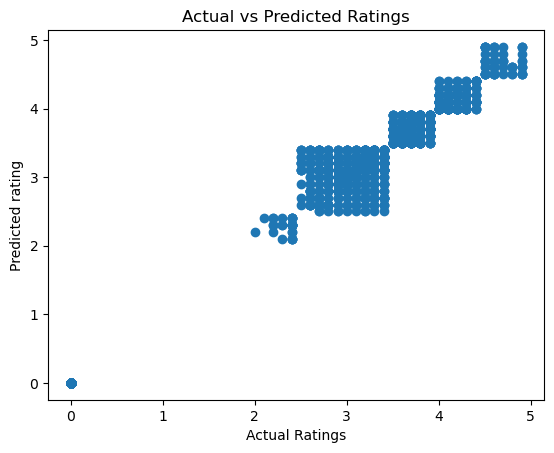

In [146]:
if 'Aggregate rating' not in data.columns:
    print("Error : Aggregate rating column not found !")
else:
    X= data.drop(columns=['Aggregate rating'])
    y= data['Aggregate rating']

    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

    numeric_features=X.select_dtypes(include=['int64','float64']).columns
    categorical_features= X.select_dtypes(include=['object']).columns
    numeric_transformer=Pipeline(steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler())
    ])
    categorical_transformer=Pipeline(steps=[
        ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
        ('onehot',OneHotEncoder(handle_unknown='ignore'))
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num',numeric_transformer,numeric_features),
            ('cat',categorical_transformer,categorical_features)
        ])

decision_tree_model = Pipeline(steps=[('preprocessor',preprocessor),('regressor',DecisionTreeRegressor())])

#Model Training
decision_tree_model.fit(X_train,y_train)
y_pred = decision_tree_model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print(f"Mean Squared Error :{mse}")
print(f"R-Squared: {r2}")

plt.scatter(y_test,y_pred)
plt.xlabel("Actual Ratings")
plt.ylabel("Predicted rating")
plt.title("Actual vs Predicted Ratings")
plt.show()


    